Загружаем необходимые для работы библиотеки (Pandas, Numpy ScikitLearn, Matplotlib - стандартный набор библиотек применяемых в Data Science) языка Python а так же включаем диррективу %matplotlib inline необходимую для отрбражения изображений построенных посредством библиотеки Matplotlib.

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import minmax_scale
from sklearn import cluster
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as mlines
import matplotlib.collections as collections
import shapefile
%matplotlib inline
import seaborn as sns

Замечание: в дальнейшем термин \verb'"класс"' используется в двух различных значениях
\begin{enumerate}
\item Концепция ООП программирования, широко используемая в большинстве современных языков программирования, служащая для объединения программного кода в некие семантически/логически/функционально связанные сущьности, и предоставляющая средства для оперирования с этими сущьностями.
\item Как класс в задачах классификации машинного обучения. В данном случае смысл термина класс близок к бытовому его восприятию (например классом в таком понимании является сорт цветка - роза, тюльпан, и т.д. тип траспортного средства - автомобиль, мотоцикл, самолёт и т.д.)
\end{enumerate}
Читаем источник данных (файл в формате .xlsx) с помощью метода read_excel библиотеки Pandas предазначенной для работы 
с данными, прежде всего для операций с DataFrames - основным способом представления данных используемым различным программным обеспечением в области Machine Learning / Data Science. Каждый лист Excel-я читаем отдельно
получая для каждого листа отдельный датафрейм.

In [2]:
excel_file = pd.ExcelFile('source_data.xlsx')

In [3]:
sheet0 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[0],
        skiprows=[0],
        header=1,
    )
sheet0 = sheet0[sheet0.columns.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])]
sheet0.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [4]:
sheet1 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[1],
        skiprows=[0, 1, 2],
        header=1,
    )
sheet1 = sheet1[sheet1.columns.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])]
sheet1.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [5]:
sheet2 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[2],
        skiprows=[0, 1],
        header=1,
    )
sheet2 = sheet2[sheet2.columns.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])]
sheet2.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [6]:
sheet3 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[3],
        skiprows=[0, 1],
        header=1,
    )
sheet3 = sheet3[sheet3.columns.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])]
sheet3.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [7]:
sheet4 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[4],
        skiprows=[0, 1, 2],
        header=1,
    )
sheet4 = sheet4[sheet4.columns.drop(['Unnamed: 0', 'Unnamed: 1'])]
sheet4.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [8]:
sheet5 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[5],
        skiprows=[0, 1],
        header=1,
    )
sheet5 = sheet5[sheet5.columns.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])]
sheet5.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [9]:
sheet6 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[6],
        skiprows=[0, 1, 2, 3, 4],
        header=1,
    )
sheet6 = sheet6[sheet6.columns.drop(['Unnamed: 0', 'Unnamed: 1'])]
sheet6.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [10]:
sheet7 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[7],
        skiprows=[0, 1, 2, 3],
        header=1,
    )
sheet7 = sheet7[sheet7.columns.drop(['Unnamed: 0', 'Unnamed: 1'])]
sheet7.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [11]:
sheet8 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[8],
        skiprows=[0, 1, 2],
        header=1,
    )
sheet8 = sheet8[sheet8.columns.drop(['Unnamed: 0', 'Unnamed: 1'])]
sheet8.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [12]:
sheet9 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[9],
        skiprows=[0, 1, 2, 3],
        header=1,
    )
sheet9 = sheet9[sheet9.columns.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])]
sheet9.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [13]:
sheet10 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[10],
        skiprows=[0, 1, 2],
        header=1,
    )
sheet10 = sheet10[sheet10.columns.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])]
sheet10.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [14]:
sheet11 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[11],
        skiprows=[0, 1, 2],
        header=1,
    )
sheet11 = sheet11[sheet11.columns.drop(['Unnamed: 0', 'Unnamed: 1'])]
sheet11.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [15]:
sheet12 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[12],
        skiprows=[0, 1, 2],
        header=1,
    )
sheet12 = sheet12[sheet12.columns.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])]
sheet12.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [16]:
sheet13 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[13],
        skiprows=[0, 1],
        header=1,
    )
sheet13 = sheet13[sheet13.columns.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])]
sheet13.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [17]:
sheet14 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[14],
        skiprows=[0, 1],
        header=1,
    )
sheet14 = sheet14[sheet14.columns.drop(['Unnamed: 0', 'Unnamed: 1'])]
sheet14.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [18]:
sheet15 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[15],
        skiprows=[0, 1, 2],
        header=1,
    )
sheet15 = sheet15[sheet15.columns.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])]
sheet15.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [19]:
sheet16 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[16],
        skiprows=[0, 1, 2],
        header=1,
    )
sheet16 = sheet16[sheet16.columns.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])]
sheet16.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [20]:
sheet17 = pd.read_excel('source_data_1.xlsx')
sheet17 = sheet17[sheet17.columns.drop(['Unnamed: 11', 'ВНУТРЕННИЕ ЗАТРАТЫ НА НАУЧНЫЕ ИССЛЕДОВАНИЯ И РАЗРАБОТКИ'])]
sheet17.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

Для дальнейших операций объединяем полученные датафреймы в список, который в свою очередь состоит из подсписков 
содержащих собственно сам датафрейм и ассоциированное с ним название максимально соответствующее русскому названию
экселевского листа. В дальнейшем, эти названия станут именами столбцов датафреймов содержащих информацию разбитую по годам.

In [21]:
list_of_df = []
list_of_df.append([sheet0, 'OrganizationNum'])
list_of_df.append([sheet1, 'StaffNum'])
list_of_df.append([sheet2, 'PhDNum'])
list_of_df.append([sheet3, 'Ph.DNum'])
list_of_df.append([sheet4, 'PostgraduateNum'])
list_of_df.append([sheet5, 'DoctoralNum'])
list_of_df.append([sheet6, 'PatentNum'])
list_of_df.append([sheet7, 'UsefulPatentsNum'])
list_of_df.append([sheet8, 'CreatedTechnologyNum'])
list_of_df.append([sheet9, 'UsefulTechnologyNum'])
list_of_df.append([sheet10, 'ProportionOfOrganizationsToUseInternet'])
list_of_df.append([sheet11, 'ProportionOfInnovativeOrgainzations'])
list_of_df.append([sheet12, 'TechnologicalInnovationsCost'])
list_of_df.append([sheet13, 'AmountOfInnovativeProducts'])
list_of_df.append([sheet14, 'ProportionOfInnovativeProducts'])
list_of_df.append([sheet15, 'Population'])
list_of_df.append([sheet16, 'GrossProduct'])
list_of_df.append([sheet17, 'InternalCosts'])

Отдельно сохраняем соответствующие русскоязычные названия в виде списка, в том же порядке в котором идут датафреймы в списке датафреймов.

In [22]:
features_names_ru = [
    'ОРГАНИЗАЦИИ, ВЫПОЛНЯЮЩИЕ НАУЧНЫЕ ИССЛЕДОВАНИЯ И РАЗРАБОТКИ',
    'численность персонала без ученых степеней, занятых НИОКР',
    'Численность исследователей, имеющих ученую степень,\n'
    'по субъектам Российской Федерации показатель\n'
    'кандидата наук- человек',
    'Численность исследователей, имеющих ученую степень,\n'
    'по субъектам Российской Федерации показатель\n'
    'доктора наук - человек',
    'Численность аспирантов по субъектам Российской Федерации - человек',
    'Численность докторантов по субъектам Российской Федерации 0человек',
    'КОЛИЧЕСТВО ПАТЕНТОВ, ВЫДАННЫХ НА ИЗОБРЕТЕНИЯ',
    'КОЛИЧЕСТВО ПАТЕНТОВ, ВЫДАННЫХ НА ПОЛЕЗНЫЕ МОДЕЛИ',
    'РАЗРАБОТАННЫЕ ПЕРЕДОВЫЕ ПРОИЗВОДСТВЕННЫЕ ТЕХНОЛОГИИ\n'
    'ПО СУБЪЕКТАМ РОССИЙСКОЙ ФЕДЕРАЦИИ',
    'ИСПОЛЬЗУЕМЫЕ ПЕРЕДОВЫЕ ПРОИЗВОДСТВЕННЫЕ ТЕХНОЛОГИИ\n'
    'ПО СУБЪЕКТАМ РОССИЙСКОЙ ФЕДЕРАЦИИ',
    'УДЕЛЬНЫЙ ВЕС ОРГАНИЗАЦИЙ ИСПОЛЬЗОВАВШИХ  ИНТЕРНЕТ\n'
    'ПО СУБЪЕКТАМ РОССИЙСКОЙ ФЕДЕРАЦИИ\n'
    '(В ПРОЦЕНТАХ ОТ ОБЩЕГО ЧИСЛА ОБСЛЕДОВАННЫХ ОРГАНИЗАЦИЙ\n'
    'СООТВЕТСТВУЮЩЕГО СУБЪЕКТА РОССИЙСКОЙ ФЕДЕРАЦИИ)',
    'ИННОВАЦИОННАЯ АКТИВНОСТЬ ОРГАНИЗАЦИЙ\n'
    '(УДЕЛЬНЫЙ ВЕС ОРГАНИЗАЦИЙ, ОСУЩЕСТВЛЯВШИХ ТЕХНОЛОГИЧЕСКИЕ,\n'
    'ОРГАНИЗАЦИОННЫЕ, МАРКЕТИНГОВЫЕ ИННОВАЦИИ В ОТЧЕТНОМ ГОДУ,\n'
    'В ОБЩЕМ ЧИСЛЕ ОБСЛЕДОВАННЫХ ОРГАНИЗАЦИЙ ( %)',
    'ЗАТРАТЫ НА ТЕХНОЛОГИЧЕСКИЕ ИННОВАЦИИ ОРГАНИЗАЦИЙ (руб)',
    'ОБЪЕМ ИННОВАЦИОННЫХ ТОВАРОВ, РАБОТ, УСЛУГ (МИЛЛИОНОВ РУБЛЕЙ)',
    'УДЕЛЬНЫЙ ВЕС ИННОВАЦИОННЫХ ТОВАРОВ, РАБОТ, УСЛУГ\n'
    'В ОБЩЕМ ОБЪЕМЕ ОТГРУЖЕННЫХ ТОВАРОВ, ВЫПОЛНЕННЫХ РАБОТ,\n'
    'УСЛУГ, ПО СУБЪЕКТАМ РОССИЙСКОЙ ФЕДЕРАЦИИ (%)',
    'численность населения по субъектам российской федерации\n'
    '(оценка на конец года; тысяч человек)',
    'Валовой региональный продукт по субъектам Российской Федерации\n'
    '(в текущих  ценах;миллионов рублей)'
]

Избаляемся от строчки \verb'"ВСЕГО"' в каждом датафрейме из списка.

In [23]:
for i, df_container in enumerate(list_of_df):
    df = df_container[0]
    list_of_df[i][0] = df[df.Region != 'ВСЕГО']    

Создаём список \verb'"годовых"' датафреймов, каждый из которых содержит полный список показателей (features в терминах Data Science) для каждого региона (Столбцы - показатели, строки - регионы). Используем стандартную операцию Pandas-овских датафреймов merge (для объединения \verb'"показательных"' датафреймов в \verb'"годовые"'). В качестве столбца используемого для объединения используем столбец \verb'"Region"'. Т.е. объединяем все показатели по данному региону за год.

In [24]:
merged_df_list = []
for year in range(2005, 2015):
    result_df, feature_name = list_of_df[0]
    result_df = result_df[['Region', year]]
    result_df = result_df.rename_axis({year: feature_name} ,axis='columns')
    
    merged_df_list.append(result_df)
    
    for i in range(1, 18):
        merged_df, feature_name = list_of_df[i]
        merged_df = merged_df[['Region', year]]
        merged_df = merged_df.rename_axis({year: feature_name} ,axis='columns')
        merged_df_list[year - 2005] = pd.merge(
            merged_df_list[year - 2005],
            merged_df,
            on='Region')

Вспомогательные функции для корректировки некорректно представленных значений (например содержащих в качестве десятичного разделителя запятую) в датафреймах.

In [25]:
def str_to_num(s):
    if isinstance(s, str):
        s = s.replace(',', '.')
        s1 = s.replace(',', '')
        if s1.isdigit():
            return float(s)
    return s

In [26]:
def detect_minus(x):
    if x == '-':
        print(x)
        return True
    return False

Импортируем стандартный класс библиотеки ScikitLearn для приведения значений к одному и тому же масштабу. Создаём экземпляр этого класса.

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
scaler = MinMaxScaler()

Корректируем вручную одно из неправильных значений, а ко всему остальному применяем функции коррктировки.

In [29]:
merged_df_list[0].set_value(36, 'PostgraduateNum', 0)
merged_df_dict = {}
for i in range(0, 10):
    prepared_df = merged_df_list[i].applymap(str_to_num)
    prepared_df = prepared_df.applymap(lambda x: 0.0 if x in ['-', '0)'] else x)
    merged_df_dict[i + 2005] = prepared_df   

Объединяем список \verb'"годовых"' датафреймов в один датафрейм с иеррархическим индексом \verb'"Год/Регион"'. В дальнейшем будем производить кластеризацию используя именно этот датафрейм. Кластер в общем случае объединяет \verb'"в чём то схожие"' регионы, причём кластер при этом имеет временную (ударение на \verb'"у"') проятжённость. Т.е. каждый кластер простирается от 2005-го года до 2014-го. И один и тот же регион в разные годы может принадлежать к различным кластерам (например в 2005 - к \verb'"первому"', в 2006 - ко \verb'"второму"', а в остальные годы - к \verb'"четвёртому"') а может и всё время оставаться в одном и том же кластере. 

In [30]:
hier_concatenated_df = pd.concat(merged_df_dict, names=['Year', 'Region'])

In [31]:
hier_concatenated_df = hier_concatenated_df.applymap(str_to_num)
hier_concatenated_df = hier_concatenated_df.applymap(
    lambda x: 0.0 if x in ['-', '0)'] else x
)

Корректируем вручную ещё два неверных значения.

In [32]:
hier_concatenated_df.loc[(2014, 41), 'GrossProduct'] = 1671397.10

In [33]:
hier_concatenated_df.loc[(2014, 8), 'GrossProduct'] = 395700.10

In [34]:
droped_regions_hier_concatenated_df = hier_concatenated_df[
    hier_concatenated_df.columns.drop('Region')
]

Приводим к единому масштабу, используя ранее созданный экземпляр класса MinMaxScaler.

In [35]:
scaled_with_dropped_regions_hier_concantenated_df = pd.DataFrame(
        scaler.fit_transform(droped_regions_hier_concatenated_df),
        columns=droped_regions_hier_concatenated_df.columns
    )

Алгоритмы машинного обучения в библиотеке ScikitLearn оформлены в виде классов, получающих на входе (при создании экземпляра класса) параметры  определяюще работу соответствующего алгоритма. Далее при вызове метода fit созданный экземпляр класса получает значения используемые для обучения в виде массивов библиотеки Numpy.
Извлекаем из датафрейма соответствующий массив Numpy просто обращаясь к полю датафрейма values.
\\В качестве алгоритам класстеризации используем MeanShift. Основная идея алгоритма - поиск локальных максимумов функции плотности в пространстве признаков (features space). Попросту говоря ищутся те области (regions) пространства признаков где точки (в нашем случае точка - набор значений показателей для данного региона в данном году) расположены наиболее плотно, и ищется точки в которых плотность должна была бы достичь максиума. Эти точки и являються центрами кластеров.
\\ Для поиска максимумов функции плотности, в MeanShif с кадждой точкой ассоциируетя \verb'"окно"' (window). Для точек попавших в окно . Для более строгого описания алгоритма нам надо ввести понятие kernel function - ядра. 
В частности, потому что он не требует заранее задавать количество кластеров (в отличие например от наиболее популярного алгоритма \verb'"обучения без учителя"' K-Means).
Создаём экземпляр класса MeanShift, задавая ему некоторые из параметров. Далее вызываем стандартный для всех классов ScikitLearn реализующих методы машинного обучения метод fit передавая ему массив обучающих значений.
После обращаясь уже к \verb'"обученному"' (произведшему класстеризацию) экземпляру класса выводим количество получившихся кластеров.

In [36]:
prepared_df_values = scaled_with_dropped_regions_hier_concantenated_df.values
bandwidth = cluster.estimate_bandwidth(
    prepared_df_values,
    quantile=0.1,
    n_samples=prepared_df_values.shape[0]
)
ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(prepared_df_values)
labels = ms.labels_
cluster_centres = ms.cluster_centers_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print("Количество кластеров: %d" % n_clusters_)

Количество кластеров: 4


Выводим (используя библиотеку Seaborn) кроскорреляционную матрицу. Кроме значения коэффициента корреляции степень корреляции выделяется цветом.

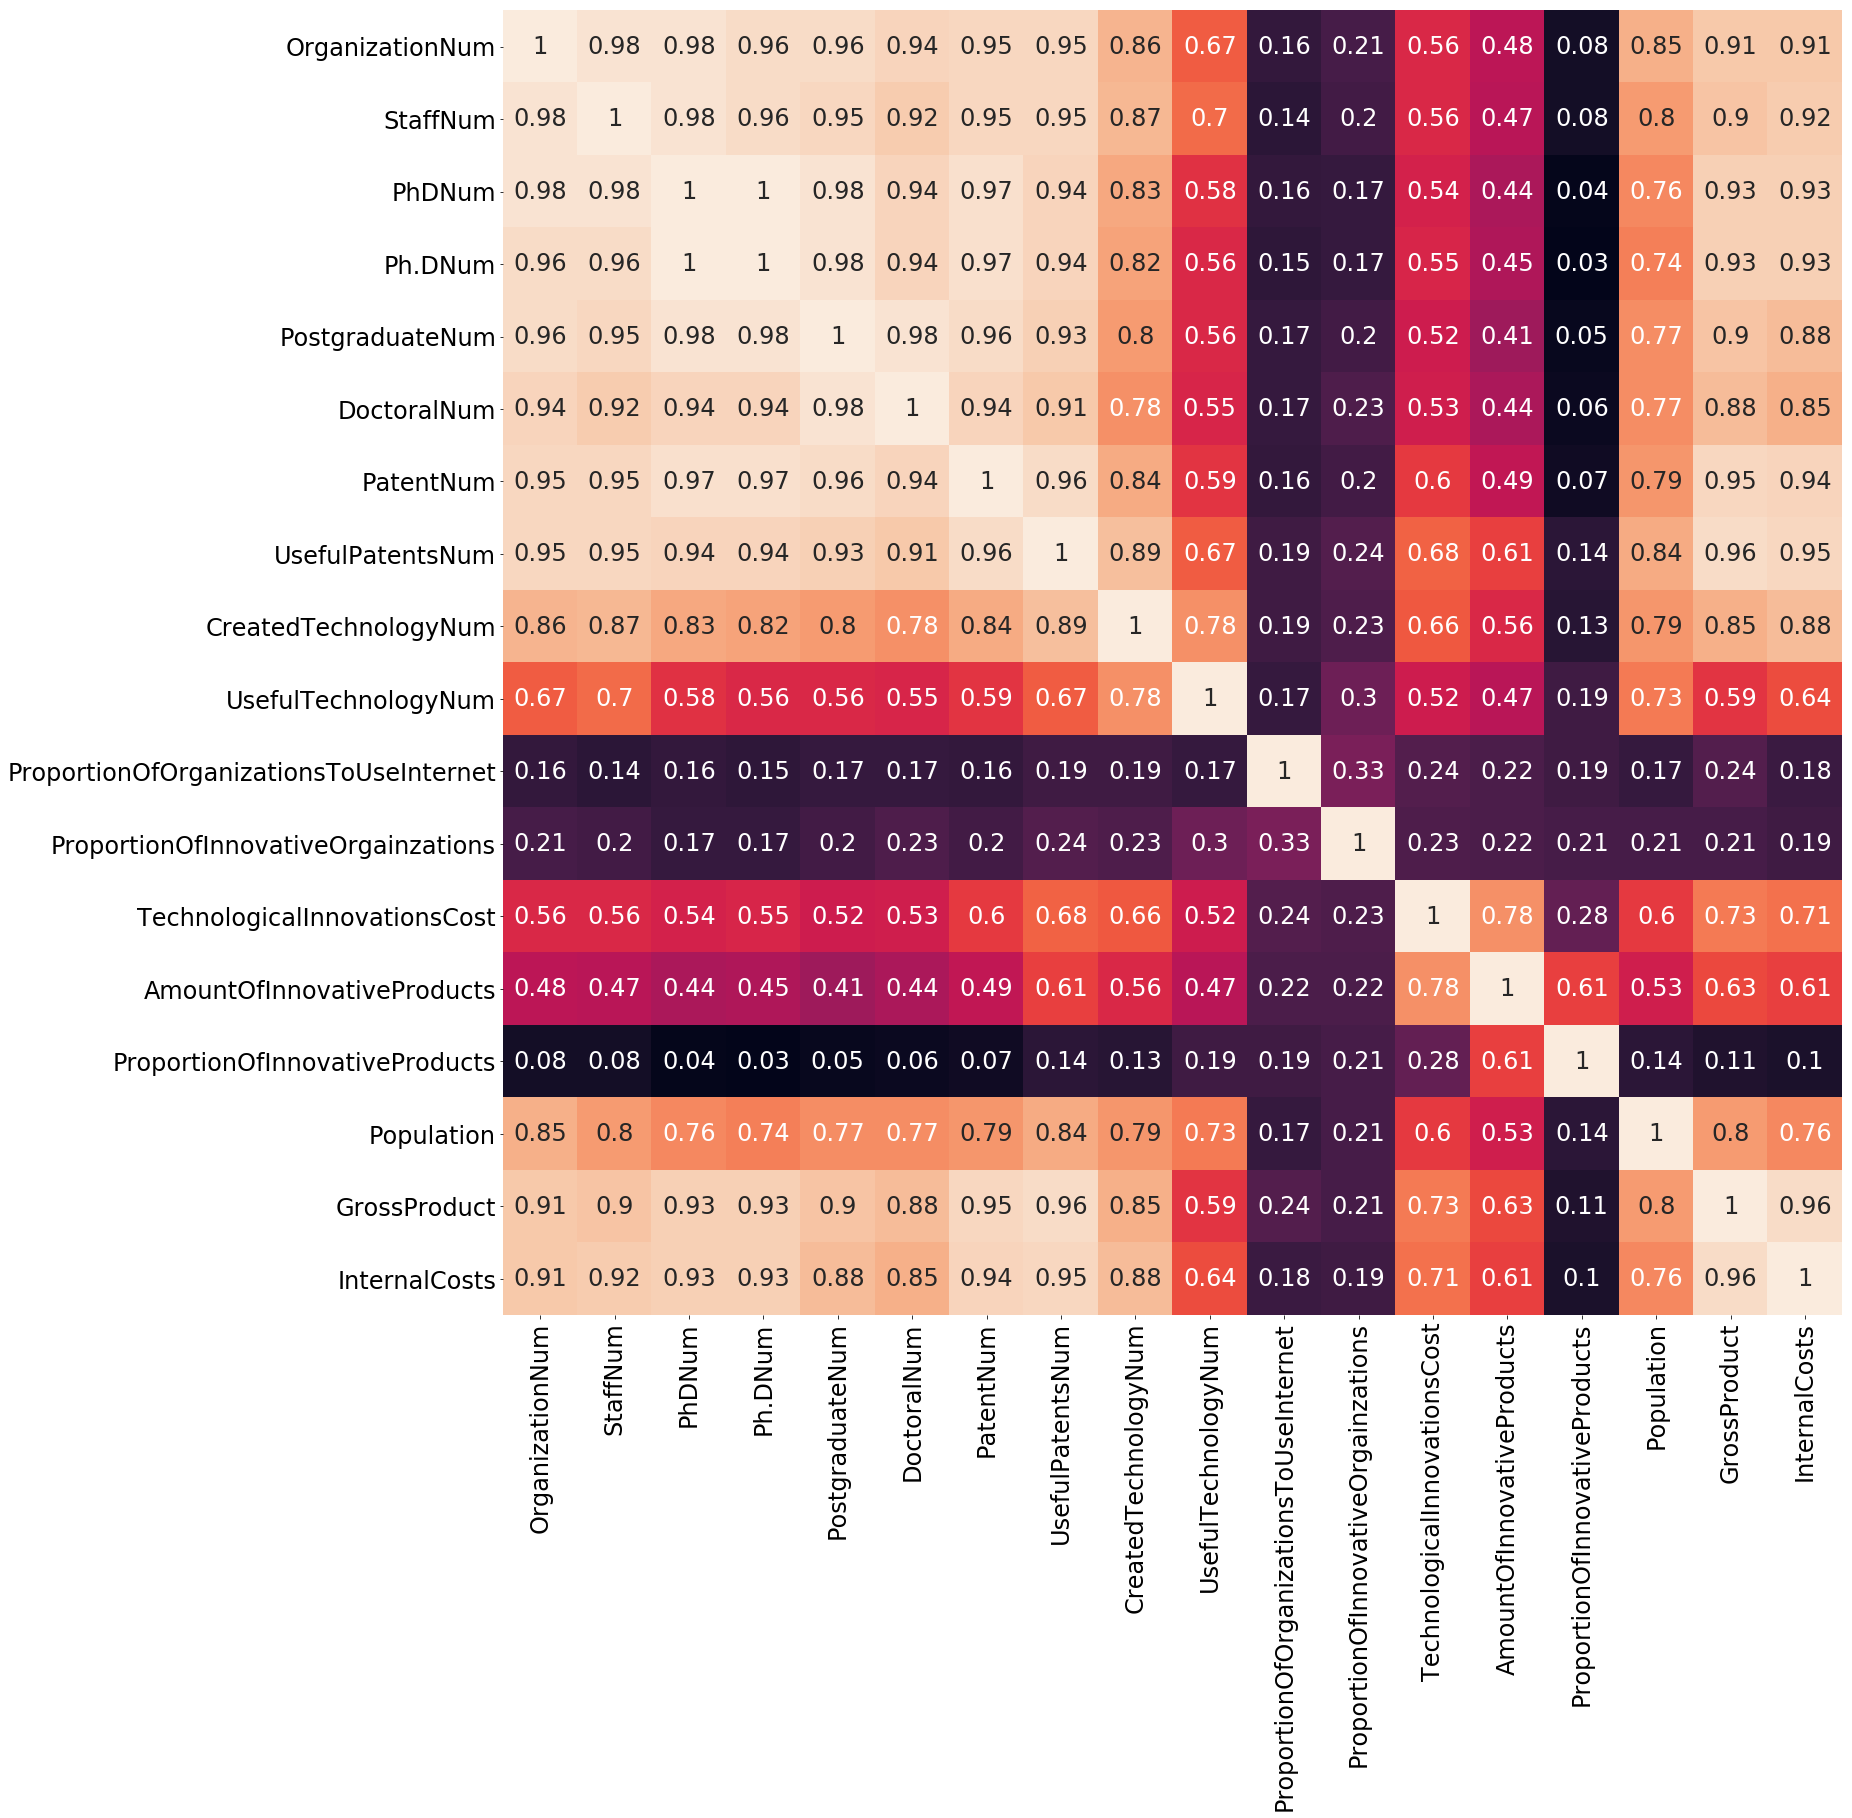

In [37]:
plt.figure(figsize=(24, 24))
heatmap_fig = sns.heatmap(
    scaled_with_dropped_regions_hier_concantenated_df.corr().round(2),
    annot=True, annot_kws={"size":24},
    cbar=False
)
for item in heatmap_fig.get_xticklabels():
    item.set_fontsize(24)
for item in heatmap_fig.get_yticklabels():
    item.set_fontsize(24)
for item in heatmap_fig.get_label():
    item.set_fontsize(24)

Далее нам необходимо как то графически отобразить полученную в результате клстеризации информацию, для того что бы эти самые результаты хотя бы как нибудь понять. А для этого нам необходимо отробрать наиболее \verb'"важные"' показатели. Мы можем для этого использовать полученную шагом ранее кроскореляционную матрицу выбрав наименее коррелирующие пары показателей. Но этот подход выявляет только линейные зависимости, и ктому же нам придётся самим как-то писать дополнительный программный код для автоматизации этого выбора (что довольно громоздко) либо выбирать пары вручную что трудно и времязатратно.
Попробуем применить другой подход. Воспользуемся тем что некоторые методы \verb'"обучения с учителем"' (supervised learning) могут ранжировать признаки (features, столбцы) по степени важности. В частности таким свойством обладают методы основанные на объединении (ensemble) деревьев решений, например Random Forest (\verb'"Лес случайных деревьев"'  \cite{litlink4}, \cite{litlink1}). В каждом узле такого дерева присходит вычисление энтропии по Шеннону либо значения критерия Джинни \cite{litlink3}, что автоматически даёт нам так же выявление нелинейных зависимостей. А разметка по классам необходимая для применения методов supervised learning у нас уже есть - принадлежность к тому или иному кластеру мы можем трактовать как принадлежность к соответсвующему классу.
Создаём копию датафрейма

In [38]:
prepared_for_supevised_df = scaled_with_dropped_regions_hier_concantenated_df.copy()

Создаём отдельное поле (столбец) которое и будет содержать метку класса (номер кластера).

In [39]:
prepared_for_supevised_df['cluster_class'] = labels

Определяем вспомогательную функцию которая понадобиться для определения лучшего сочетания параметров выбранного метода supervised learning (Random Forest-а)

In [40]:
def report_best_score(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Ранг модели: {0}".format(i))
            print("Точность: {0:.3f} (среднеквадратичное отклонение: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Значения параметров:\n")
            for name, value in results['params'][candidate].items():
                print("\t{}: {}".format(name, value))
            print("")

Создаём экземпляр стандартного ScikitLearn  класса RandomForestClassifier

In [41]:
clf = RandomForestClassifier(n_estimators=20)

Произвёдем определение наилучшего сочетания значений параметров RandomForestClassifier-а посредством простого пойска по сетке значений параметров. Определяем допустимые диапазоны значений различных параметров Random Forest-а, для дальнейшего применения пойска наилучшего сочетания значений параметров по сетке значений. Создаём экземпляр класса GridSearchCV реализующего алгоритм пойска по сетке. 

In [42]:
param_grid = {"max_depth": [3, 7],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

grid_search = GridSearchCV(clf, param_grid=param_grid)

Производим пойск по сетке значений параметров.

In [43]:
grid_search.fit(prepared_df_values, labels)
report_best_score(grid_search.cv_results_)

Ранг модели: 1
Точность: 0.956 (среднеквадратичное отклонение: 0.040)
Значения параметров:

	bootstrap: False
	criterion: entropy
	max_depth: 7
	max_features: 10
	min_samples_leaf: 1
	min_samples_split: 3

Ранг модели: 2
Точность: 0.955 (среднеквадратичное отклонение: 0.020)
Значения параметров:

	bootstrap: False
	criterion: entropy
	max_depth: 7
	max_features: 3
	min_samples_leaf: 1
	min_samples_split: 2

Ранг модели: 3
Точность: 0.953 (среднеквадратичное отклонение: 0.017)
Значения параметров:

	bootstrap: False
	criterion: entropy
	max_depth: 7
	max_features: 3
	min_samples_leaf: 3
	min_samples_split: 2

Ранг модели: 3
Точность: 0.953 (среднеквадратичное отклонение: 0.044)
Значения параметров:

	bootstrap: False
	criterion: entropy
	max_depth: 7
	max_features: 10
	min_samples_leaf: 1
	min_samples_split: 10



Создаём экземпляр RandomForestClassifier-а подставляя найденный наилучший набор значений параметров.

In [44]:
better_clf = RandomForestClassifier(
    n_estimators=20,
    bootstrap=True, criterion='gini',
    max_depth=7,
    max_features=10,
    min_samples_leaf=1,
    min_samples_split=2
)

Запускаем процесс обучения классификатора.

In [45]:
better_clf.fit(prepared_df_values, labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features=10, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

Определяем важность показателей (features) инновационности (номера соответсвующих столбцов). И выводим диаграмму в графическом виде представляющую важность показателей (в виде высоты столбцов).

Ранжированные показатели:
1. Показатель 10 (0.289111)
2. Показатель 11 (0.262304)
3. Показатель 9 (0.071884)
4. Показатель 13 (0.065859)
5. Показатель 1 (0.060438)
6. Показатель 7 (0.059264)
7. Показатель 14 (0.044693)
8. Показатель 0 (0.035476)
9. Показатель 15 (0.024609)
10. Показатель 16 (0.022439)
11. Показатель 17 (0.022051)
12. Показатель 4 (0.008301)
13. Показатель 8 (0.007594)
14. Показатель 6 (0.007171)
15. Показатель 5 (0.005998)
16. Показатель 12 (0.004338)
17. Показатель 2 (0.004328)
18. Показатель 3 (0.004142)


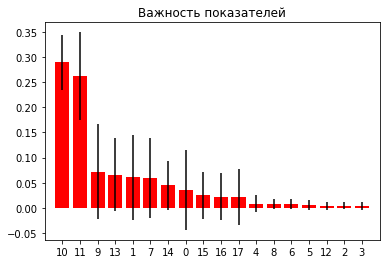

In [46]:
importances = better_clf.feature_importances_
std = np.std(
    [tree.feature_importances_ for tree in better_clf.estimators_],
    axis=0
)
indices = np.argsort(importances)[::-1]
print("Ранжированные показатели:")

for f in range(prepared_df_values.shape[1]):
    print("%d. Показатель %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

plt.figure()
plt.title("Важность показателей")
plt.bar(range(prepared_df_values.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(prepared_df_values.shape[1]), indices)
plt.xlim([-1, prepared_df_values.shape[1]])
plt.show()

Как видим самым важным (весомым) показателем оказался показатель с номером десять (считая от нуля) - \verb'"УДЕЛЬНЫЙ ВЕС ОРГАНИЗАЦИЙ ИСПОЛЬЗОВАВШИХ  ИНТЕРНЕТ ПО СУБЪЕКТАМ РОССИЙСКОЙ ФЕДЕРАЦИИ"'

Далее нам надо отобразить класстеризованные регионы на двумернных проекциях попарных сочетаний соответсвующих показателей. Для этого мы и выбирали наиболее значимые показатели - что бы сократить число выводимых двумерных проекций.
Задача графического отображения класстеризованных регионов на проекциях требует указания множества различных параметров отображения, и является довольно громоздкой. Для её решения был создан класс ClustersDrawer, исходный код (текст) которого вынесен в отдельный файл clusters_drawer.py

In [47]:
X = prepared_df_values
cluster_labels = ms.labels_

In [48]:
import clusters_drawer

Среди задаваемых параметров следует выделить ms - обученный MeanShift кластеризатор содержащий информацию о кластерах (принадлежности того или иного региона к тому или иному кластеру) и tuple (10, 7, 9, 14, 1) - номера наиболее важных показателей.

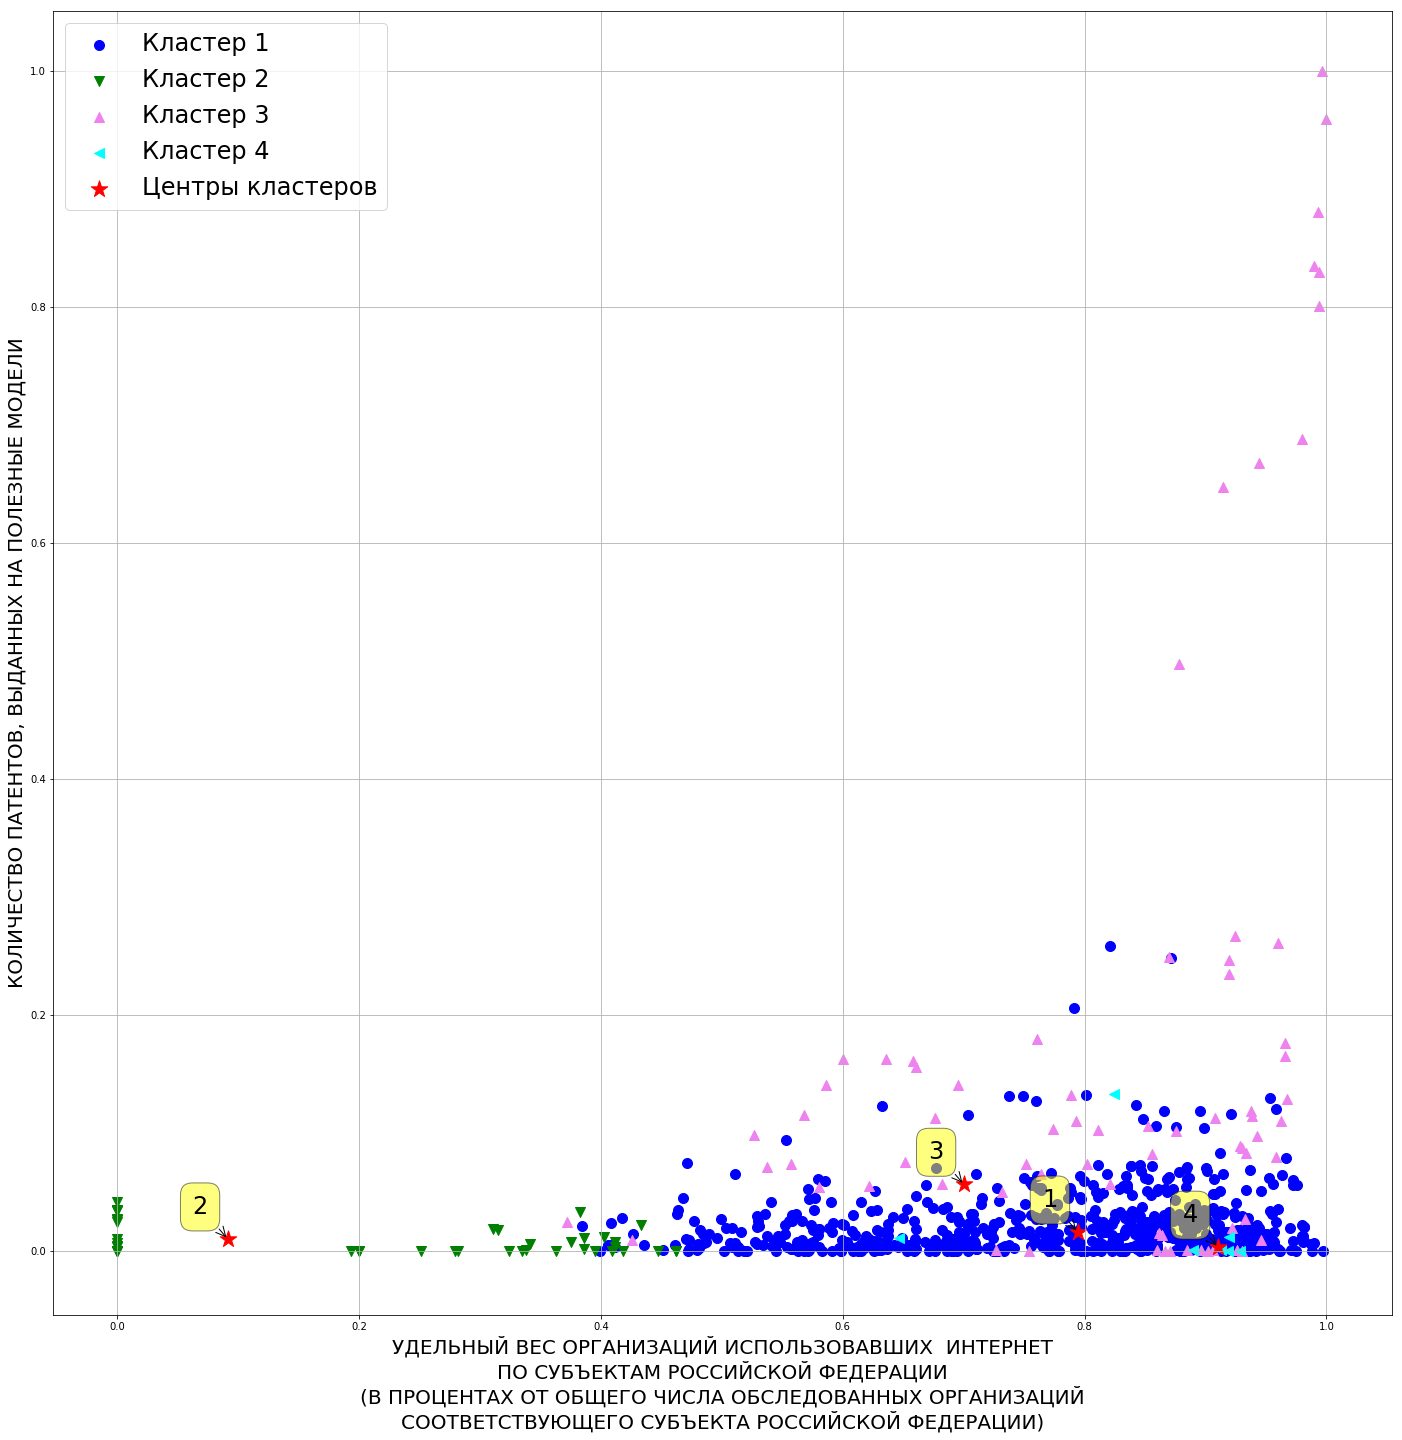

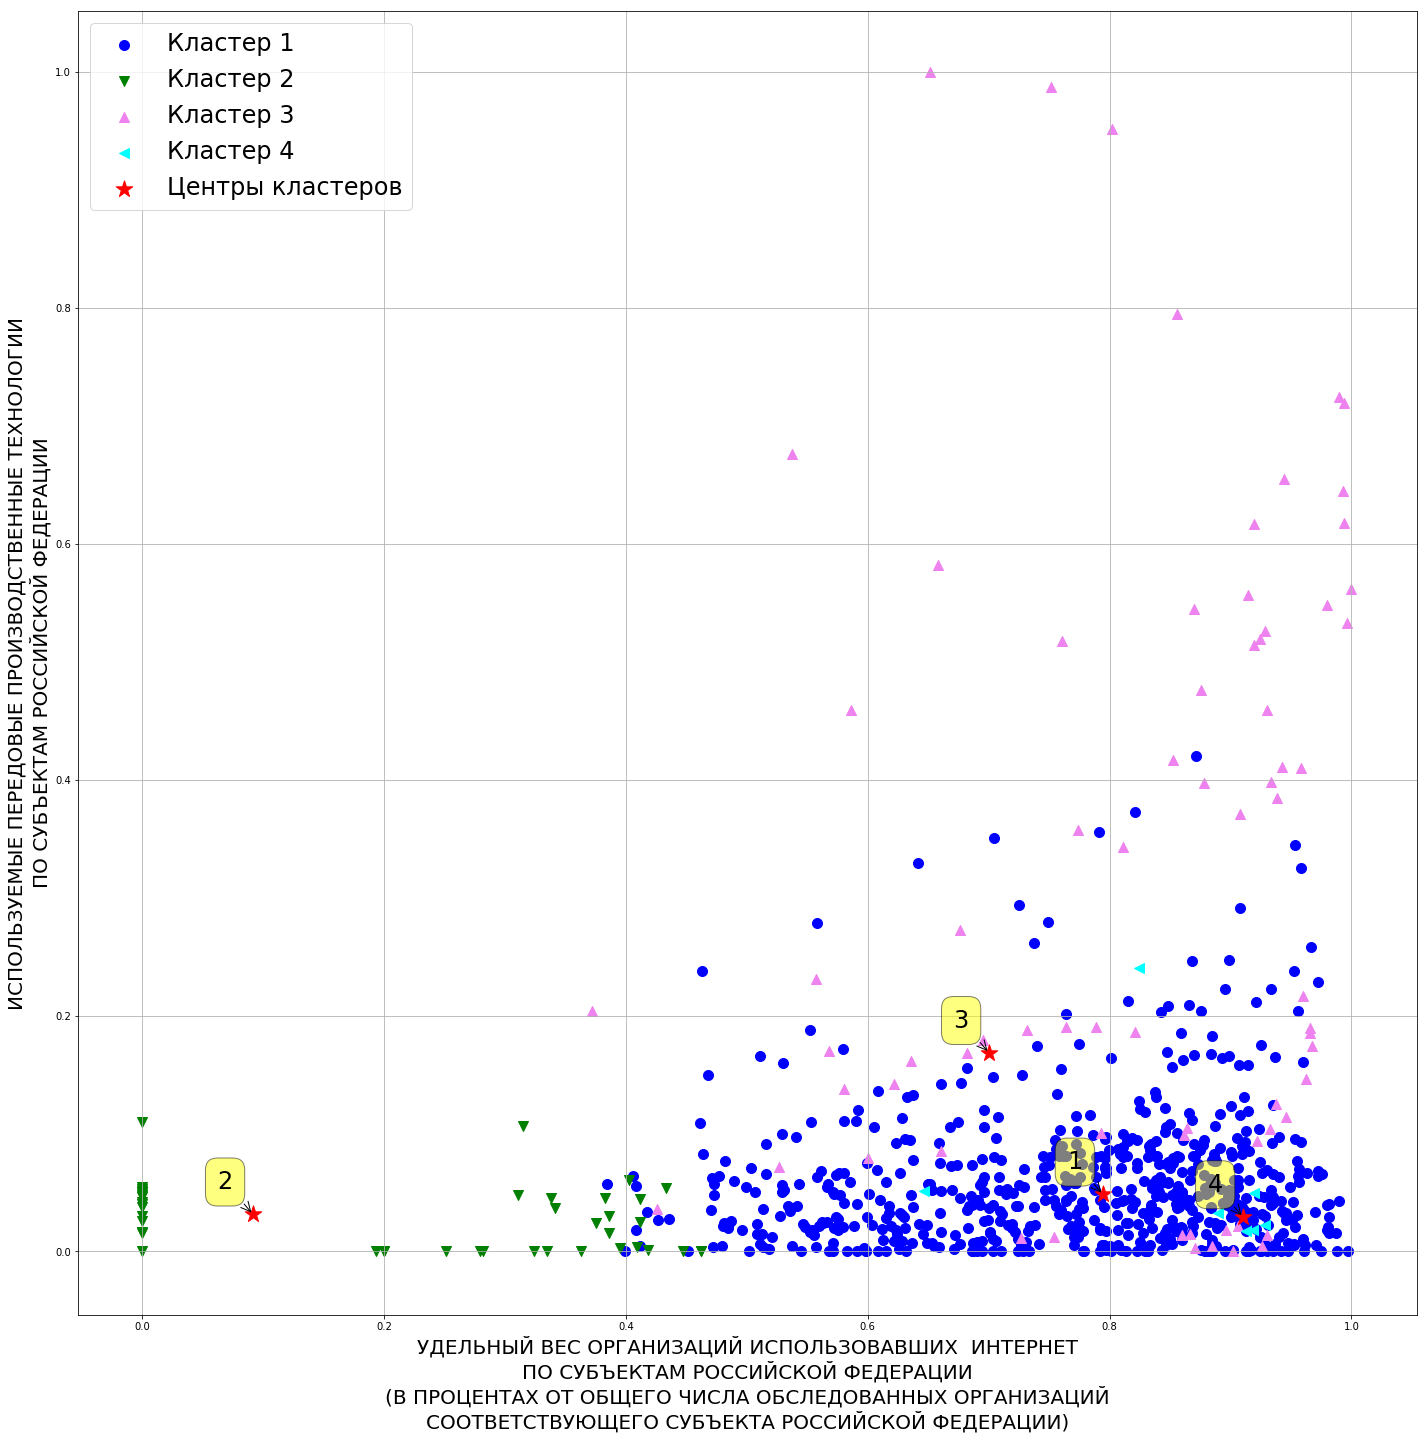

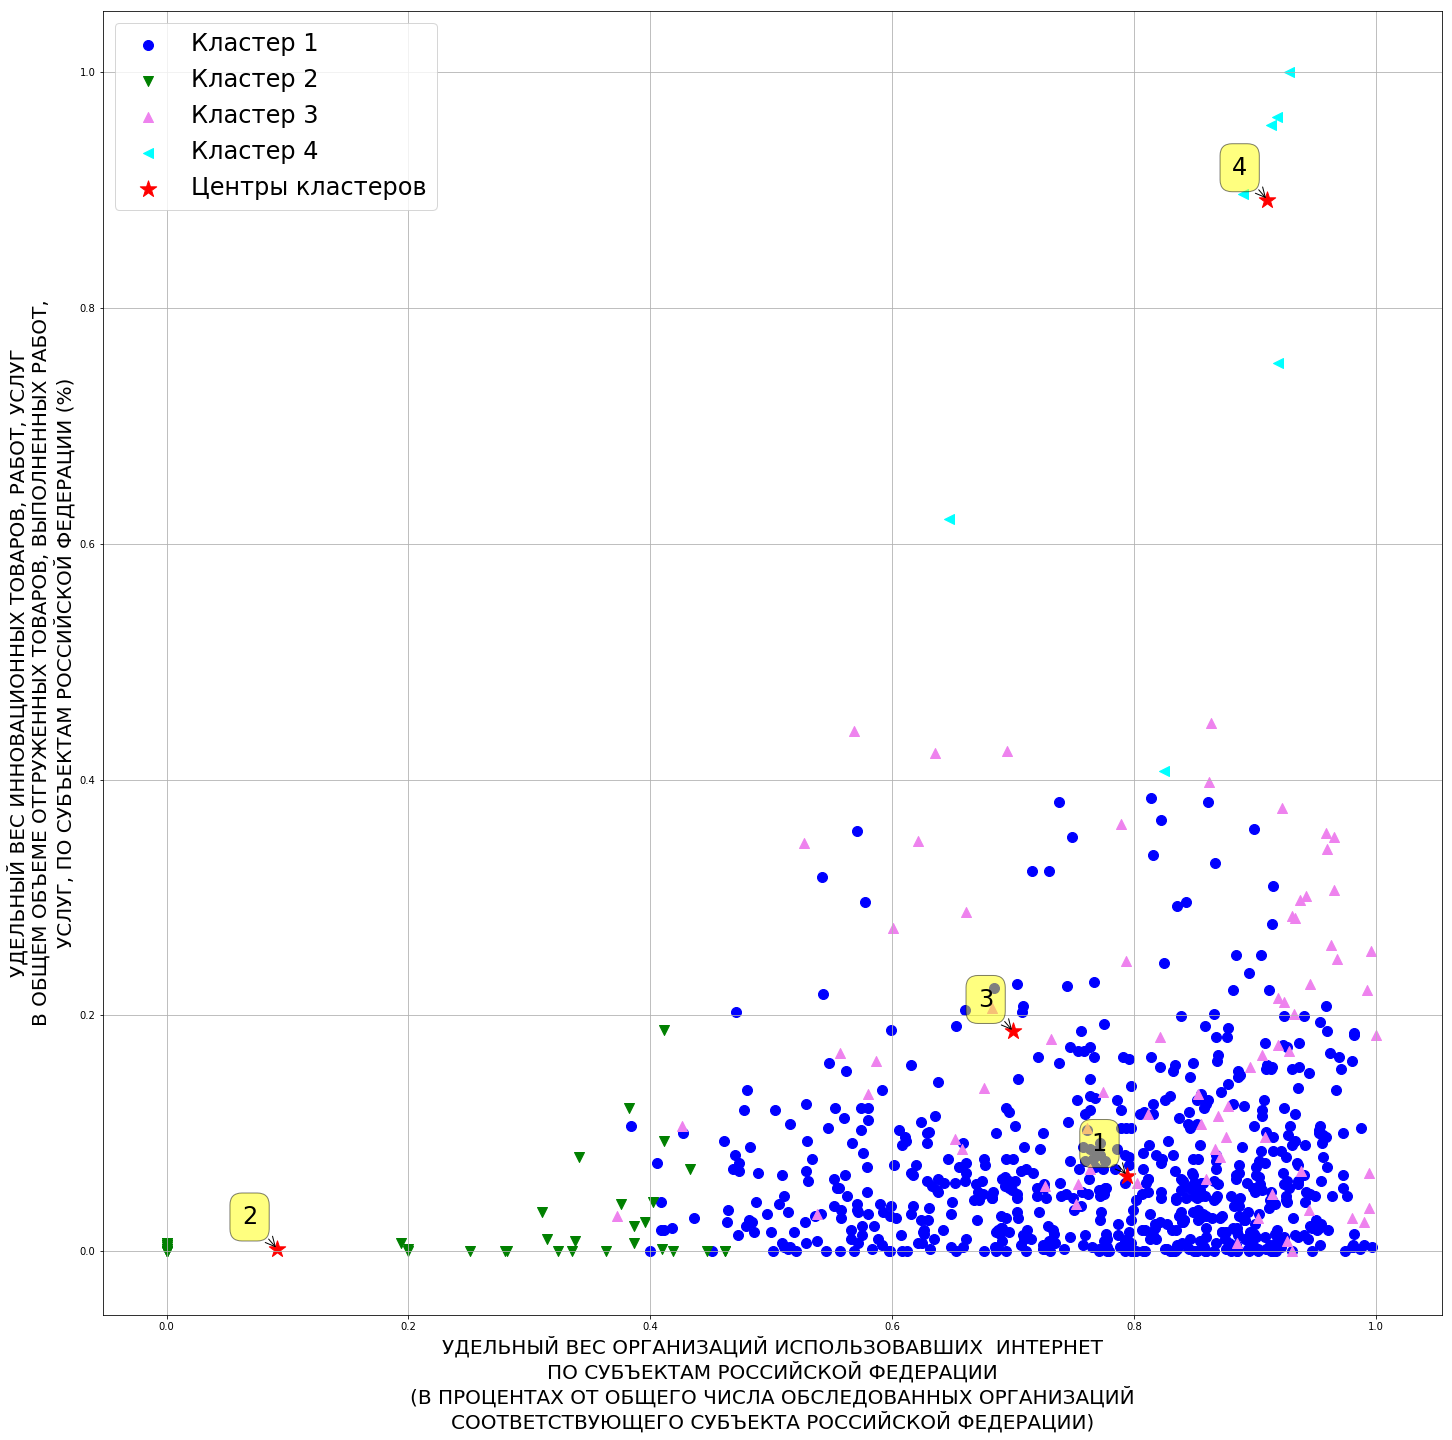

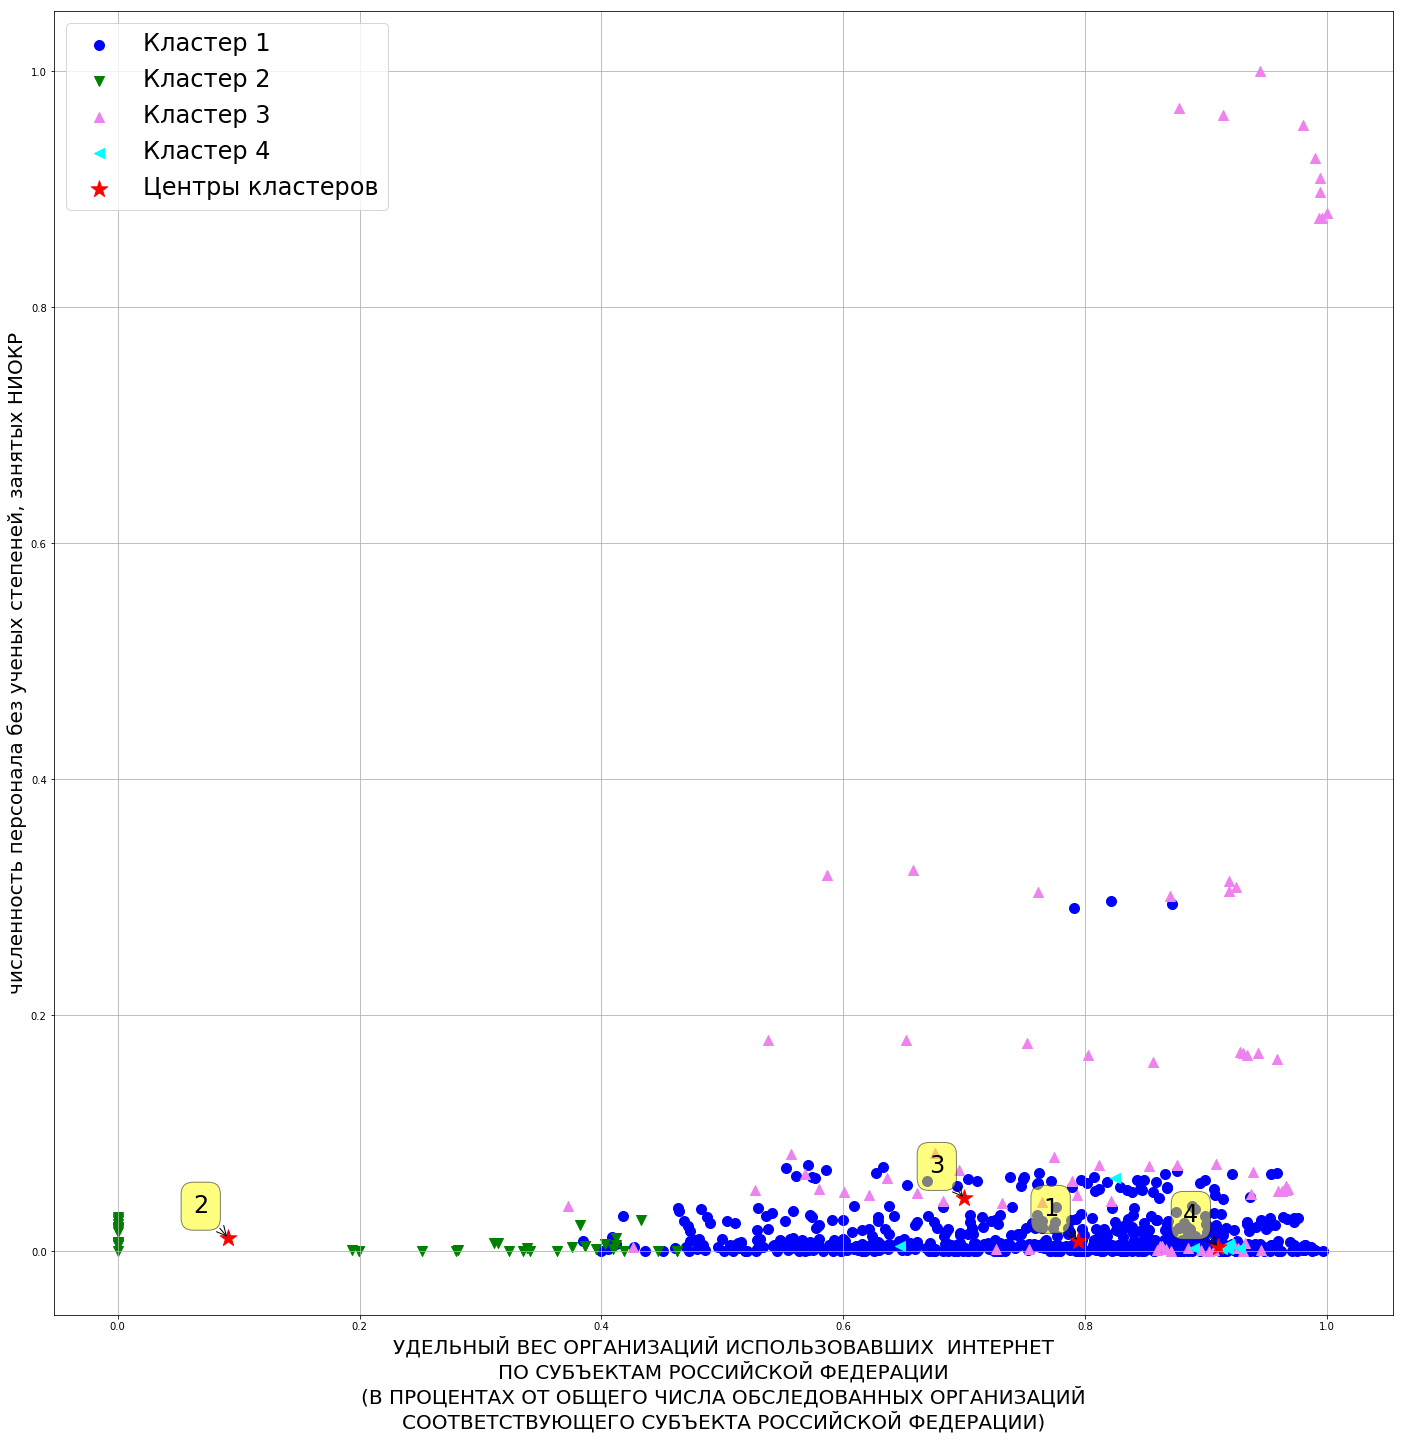

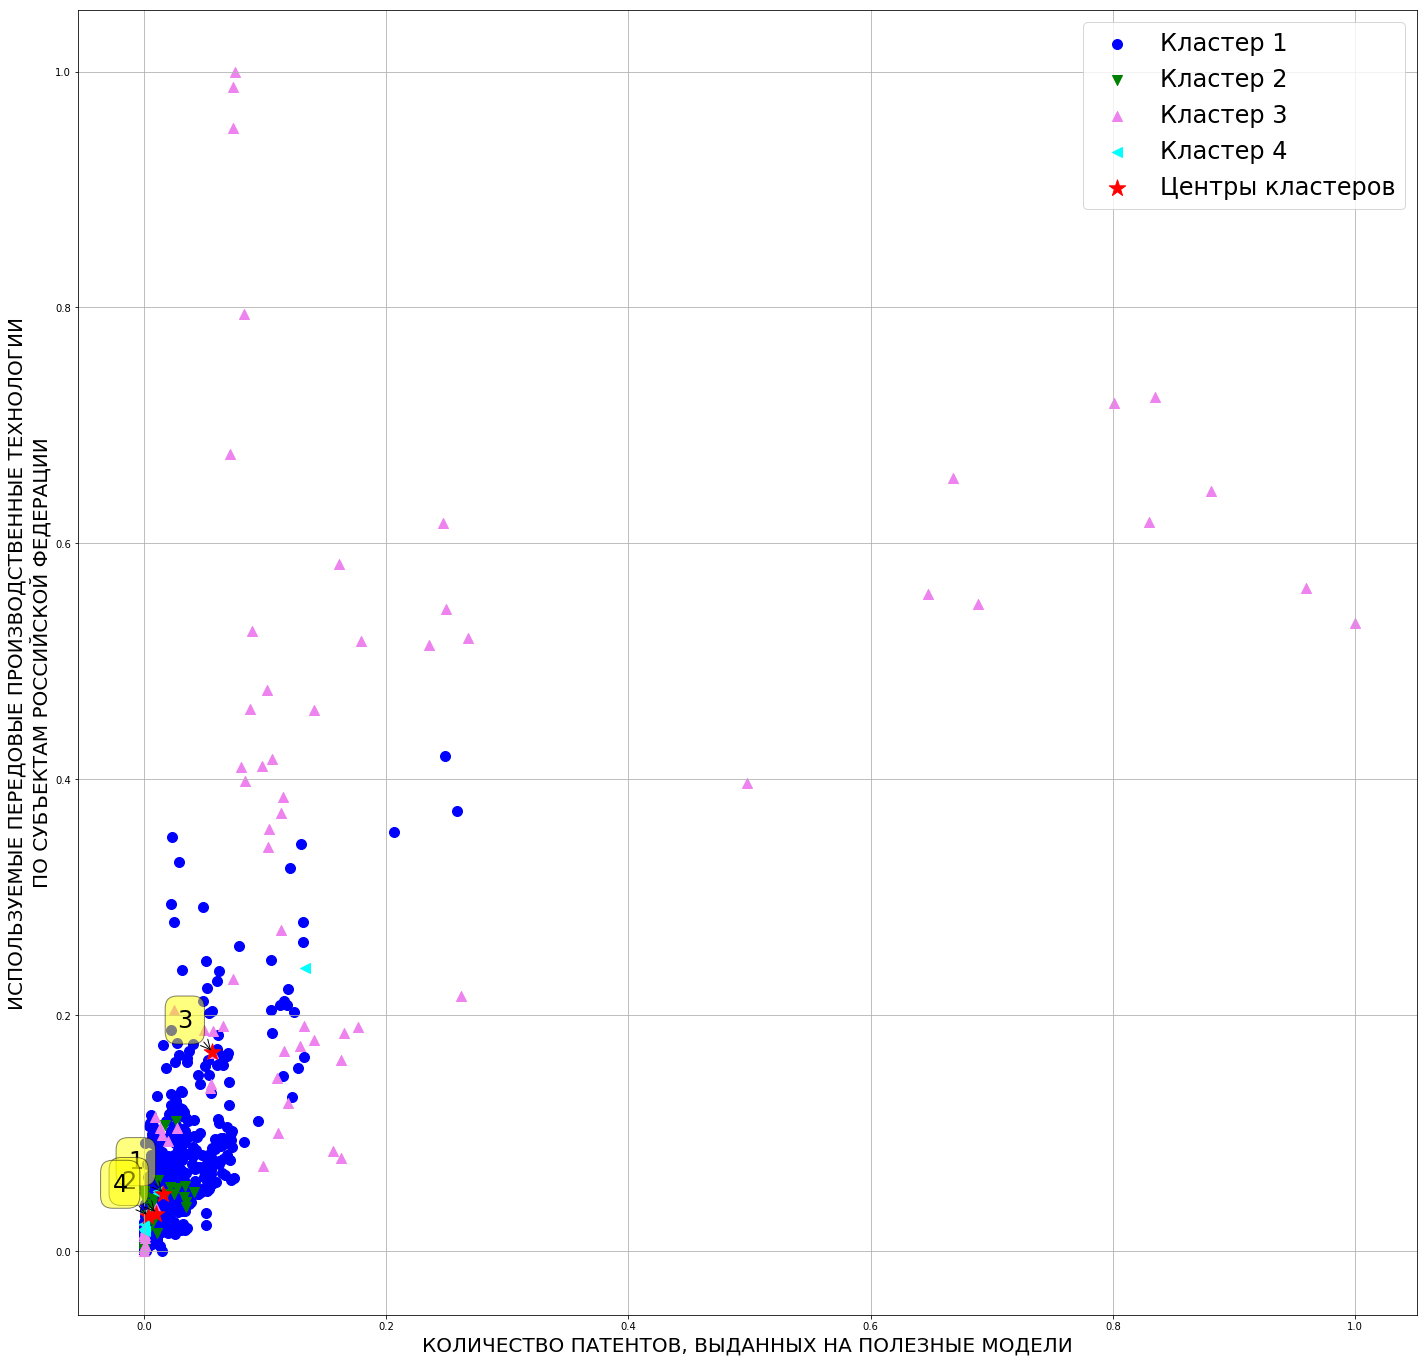

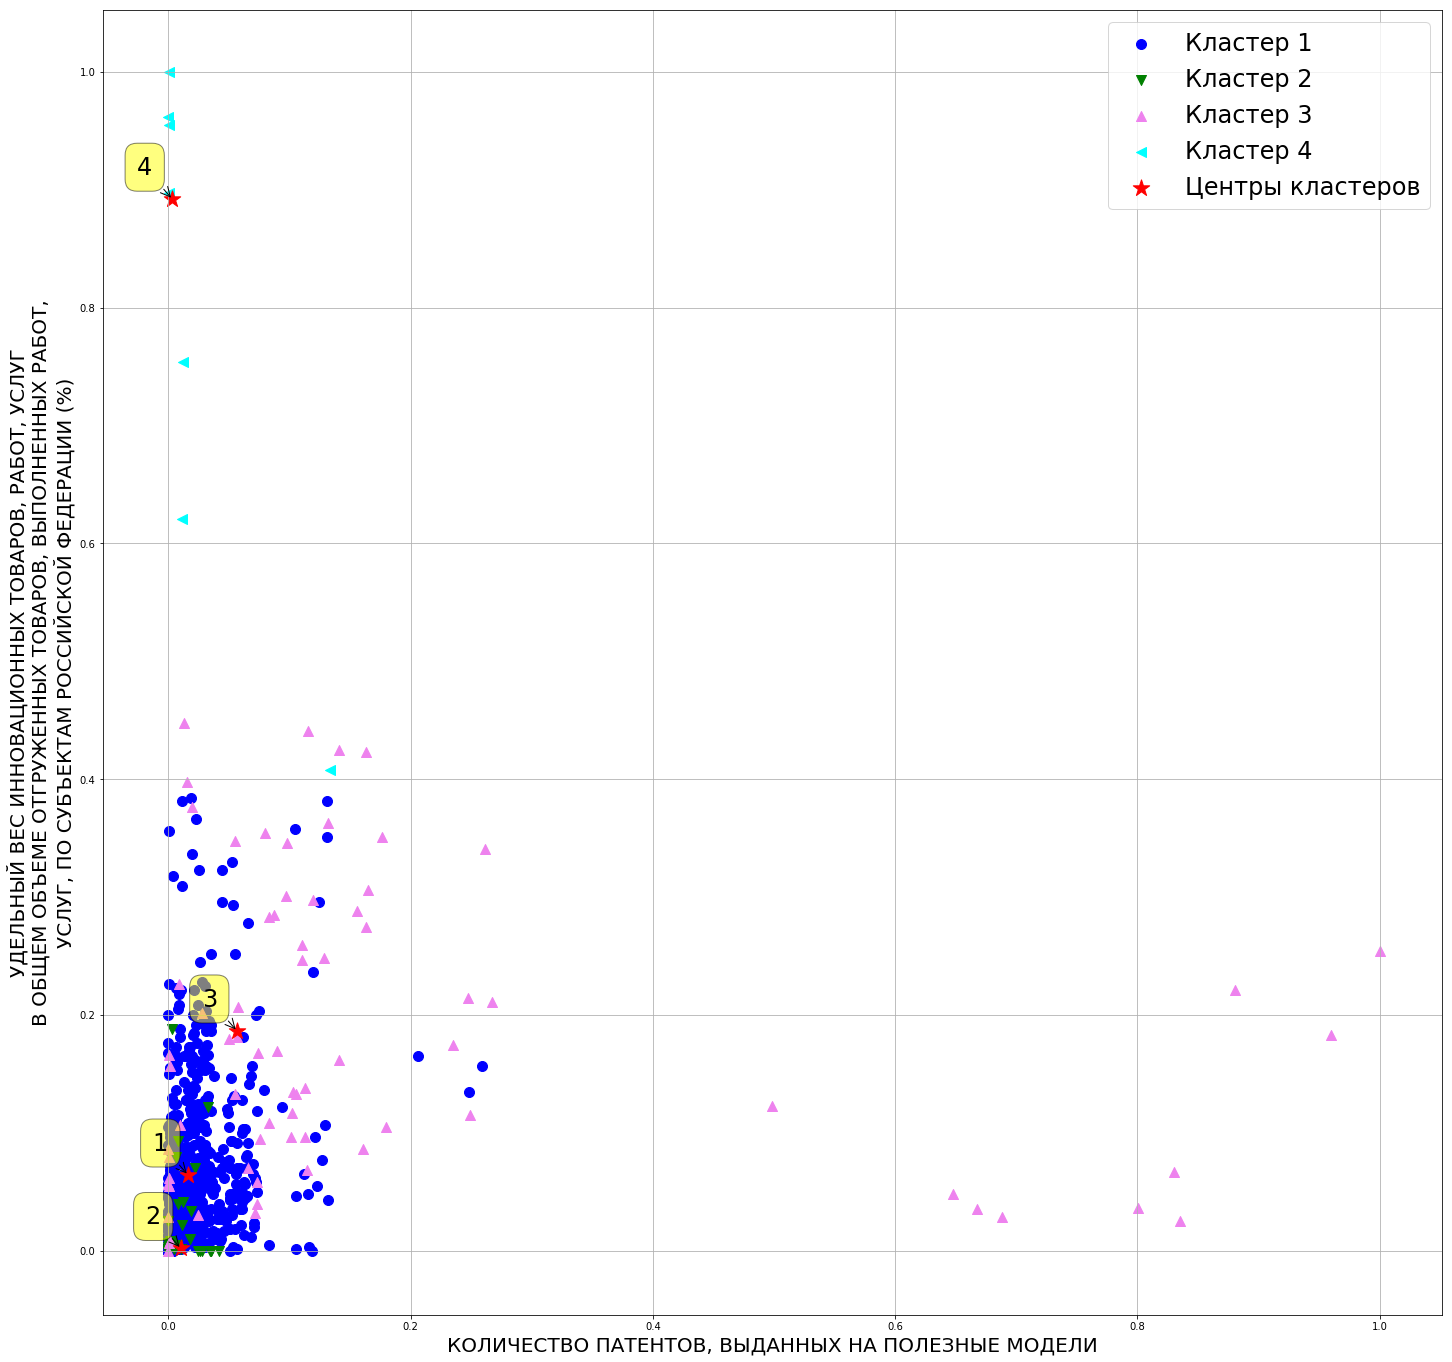

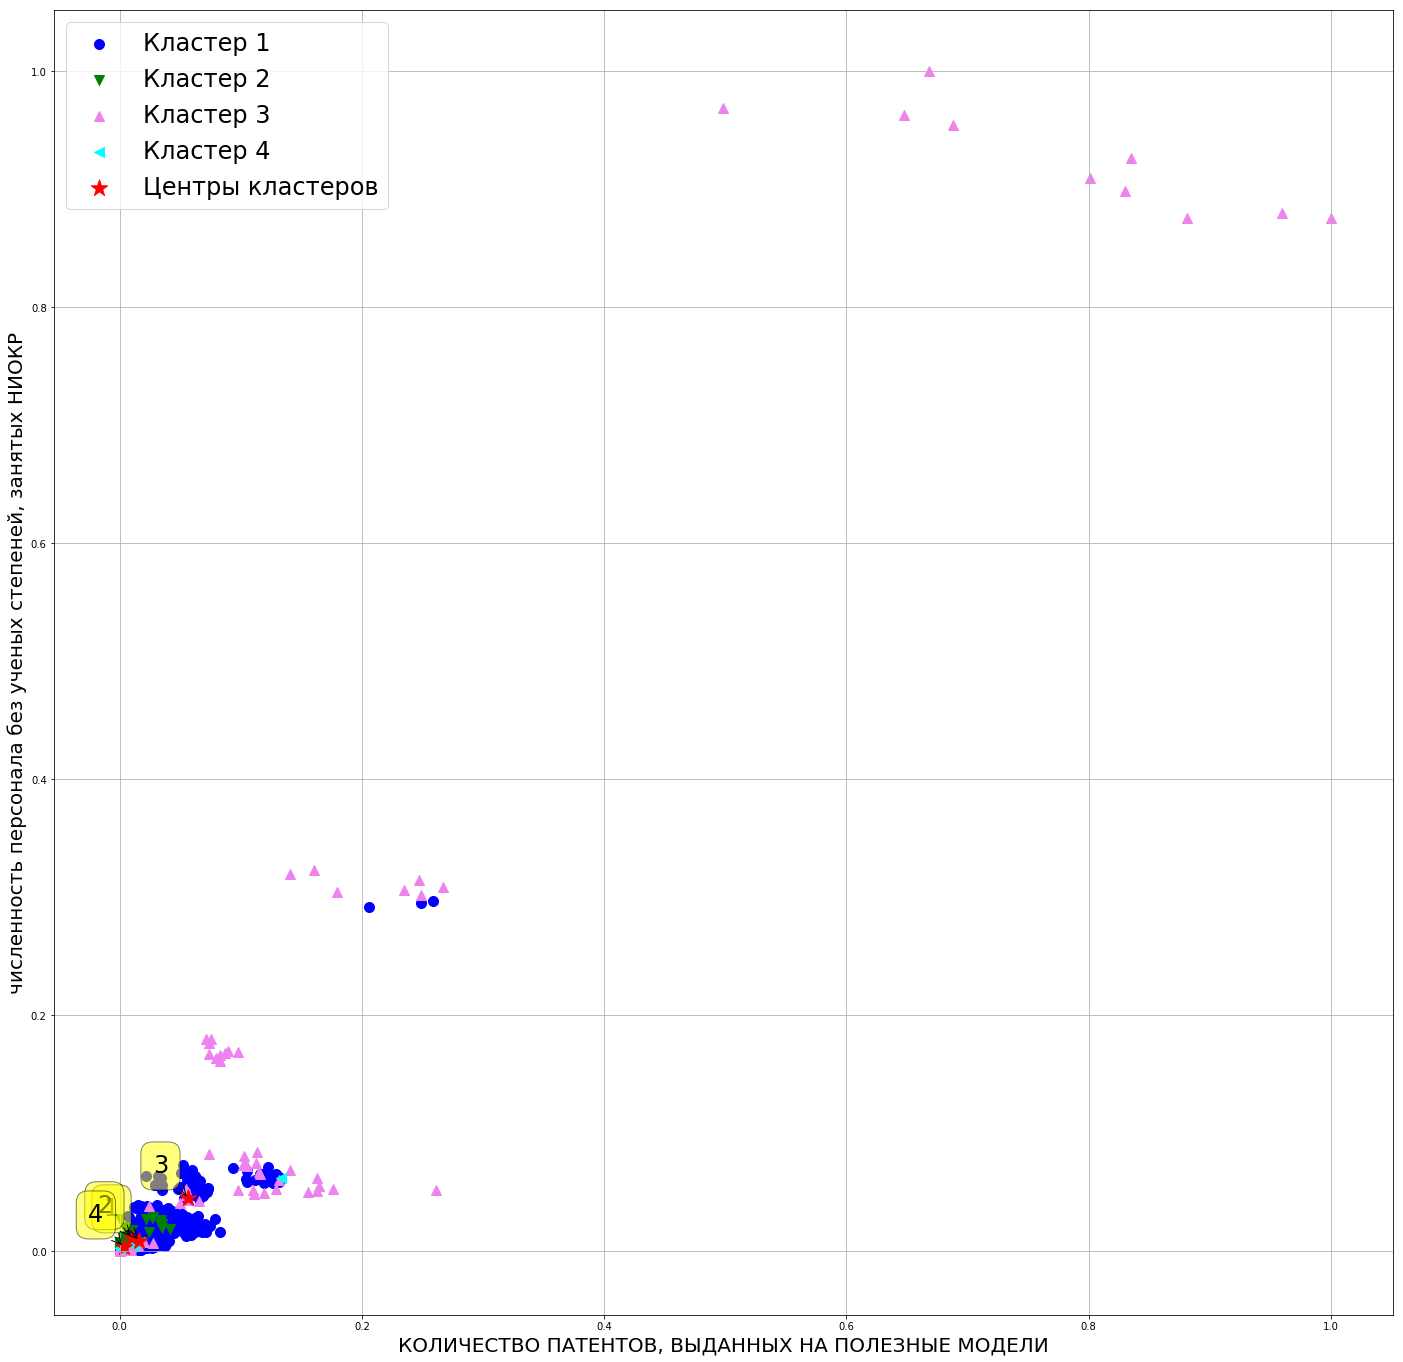

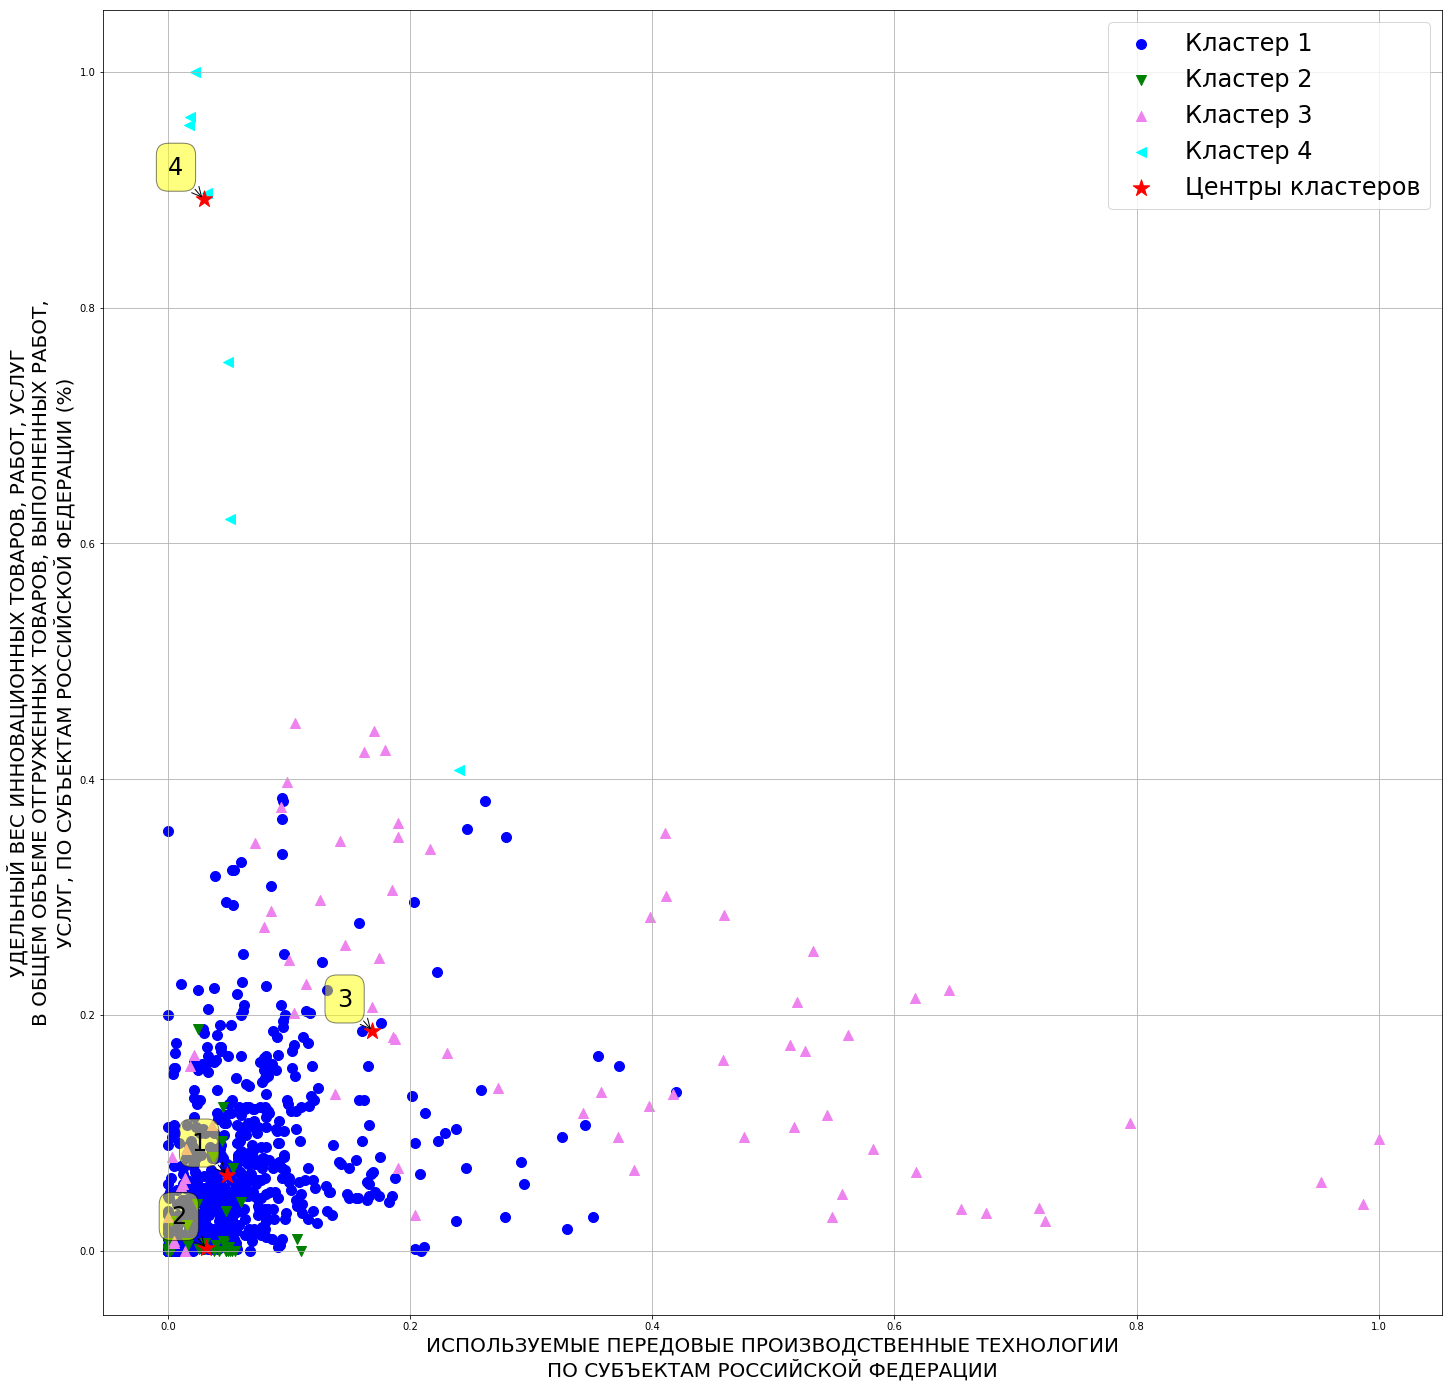

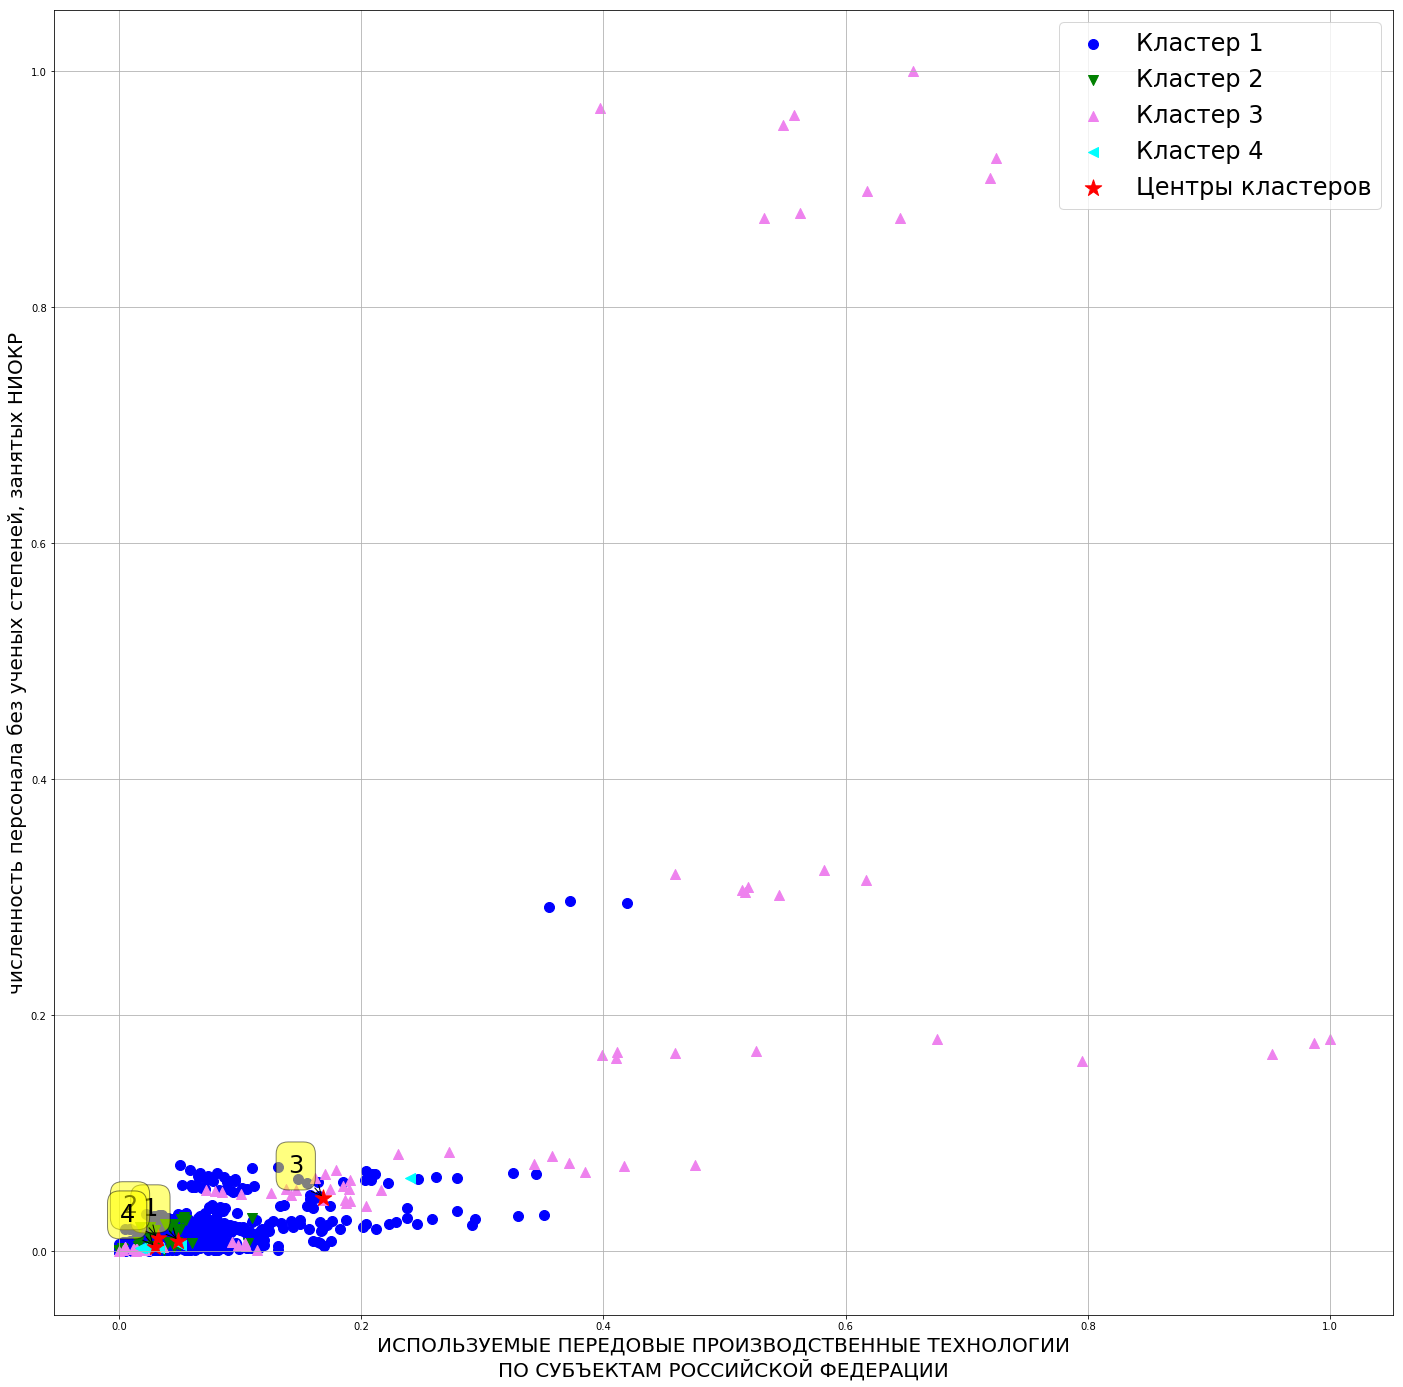

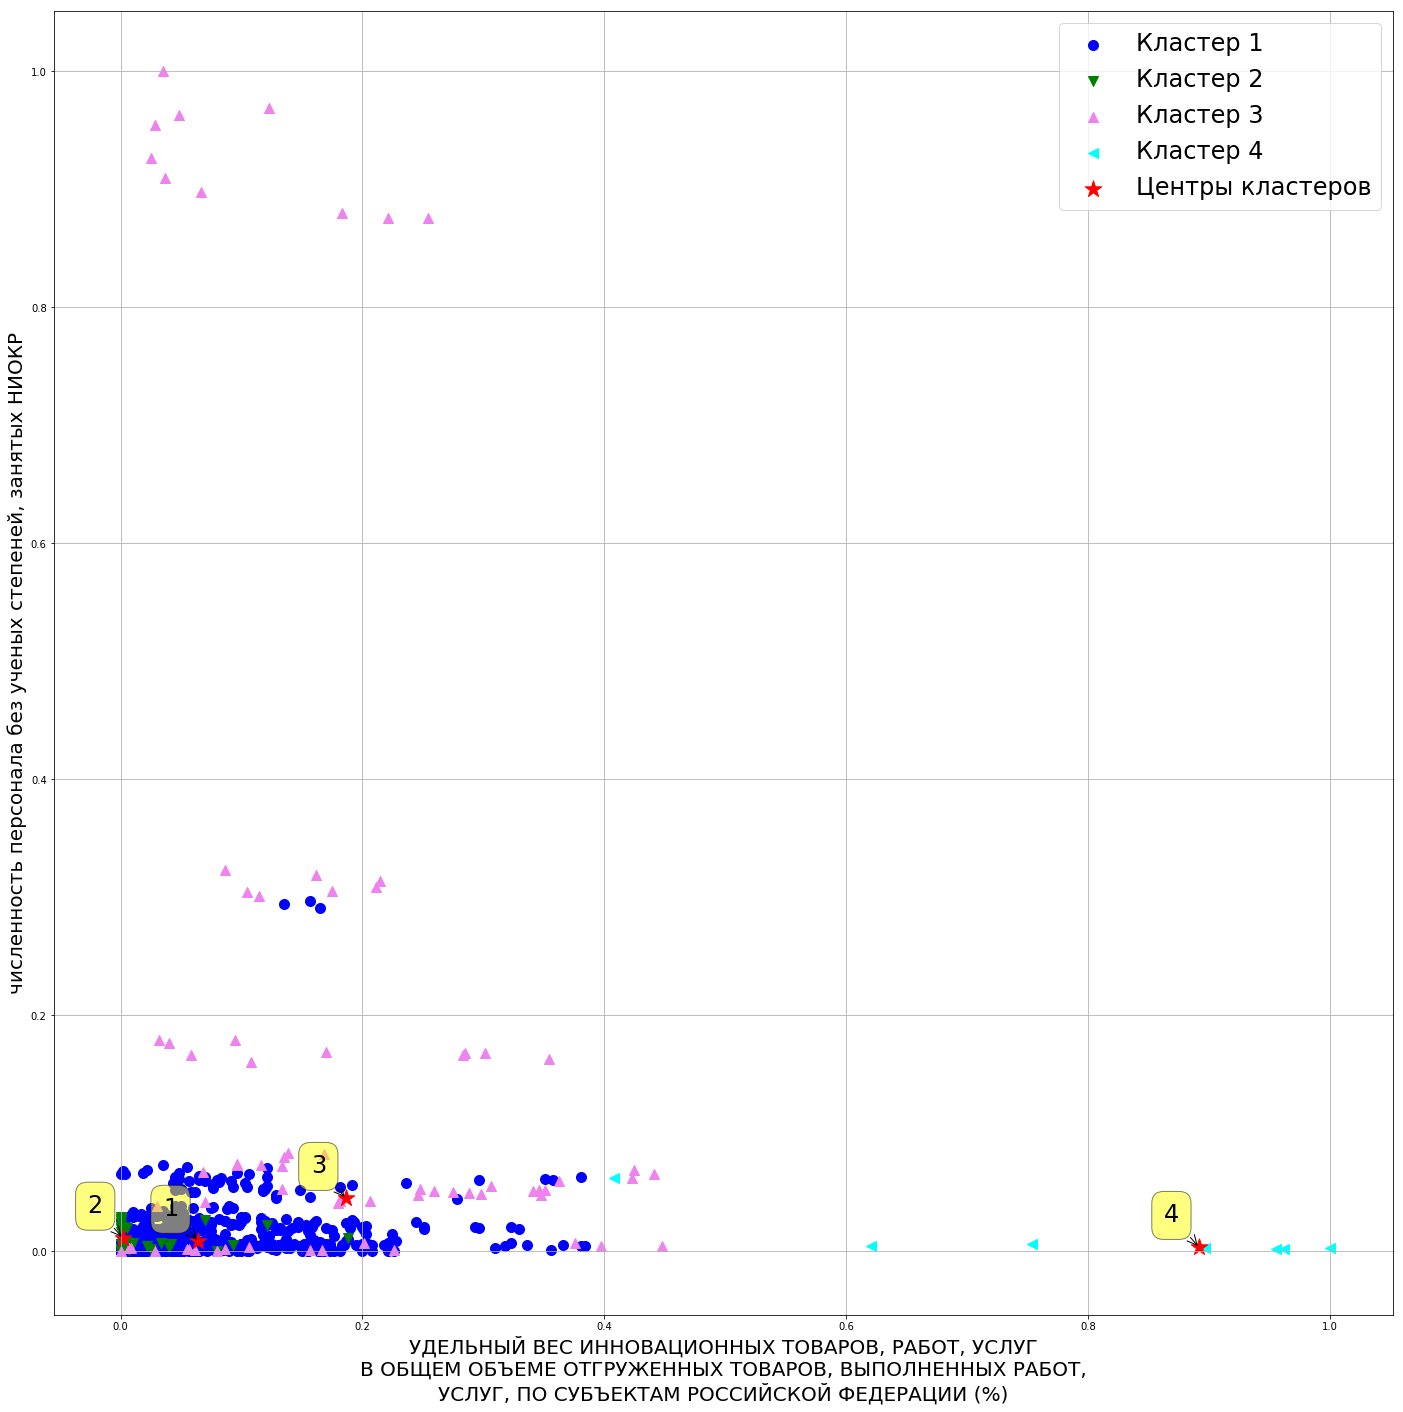

In [49]:
drawer = clusters_drawer.ClustersDrawer(
    plt,
    ms,
    X,
    (10, 7, 9, 14, 1),
    features_names=features_names_ru,
    data_colors = ['blue', 'green', 'violet', 'cyan', 'gray']
)
drawer.data_point_size = 100
drawer.draw()

In [50]:
for i, indexes in enumerate(drawer.pair_list((10, 7, 9, 14, 1))):
    x_index, y_index = indexes
    print("\n", i, features_names_ru[x_index], '\n | ', features_names_ru[y_index])


 0 УДЕЛЬНЫЙ ВЕС ОРГАНИЗАЦИЙ ИСПОЛЬЗОВАВШИХ  ИНТЕРНЕТ
ПО СУБЪЕКТАМ РОССИЙСКОЙ ФЕДЕРАЦИИ
(В ПРОЦЕНТАХ ОТ ОБЩЕГО ЧИСЛА ОБСЛЕДОВАННЫХ ОРГАНИЗАЦИЙ
СООТВЕТСТВУЮЩЕГО СУБЪЕКТА РОССИЙСКОЙ ФЕДЕРАЦИИ) 
 |  КОЛИЧЕСТВО ПАТЕНТОВ, ВЫДАННЫХ НА ПОЛЕЗНЫЕ МОДЕЛИ

 1 УДЕЛЬНЫЙ ВЕС ОРГАНИЗАЦИЙ ИСПОЛЬЗОВАВШИХ  ИНТЕРНЕТ
ПО СУБЪЕКТАМ РОССИЙСКОЙ ФЕДЕРАЦИИ
(В ПРОЦЕНТАХ ОТ ОБЩЕГО ЧИСЛА ОБСЛЕДОВАННЫХ ОРГАНИЗАЦИЙ
СООТВЕТСТВУЮЩЕГО СУБЪЕКТА РОССИЙСКОЙ ФЕДЕРАЦИИ) 
 |  ИСПОЛЬЗУЕМЫЕ ПЕРЕДОВЫЕ ПРОИЗВОДСТВЕННЫЕ ТЕХНОЛОГИИ
ПО СУБЪЕКТАМ РОССИЙСКОЙ ФЕДЕРАЦИИ

 2 УДЕЛЬНЫЙ ВЕС ОРГАНИЗАЦИЙ ИСПОЛЬЗОВАВШИХ  ИНТЕРНЕТ
ПО СУБЪЕКТАМ РОССИЙСКОЙ ФЕДЕРАЦИИ
(В ПРОЦЕНТАХ ОТ ОБЩЕГО ЧИСЛА ОБСЛЕДОВАННЫХ ОРГАНИЗАЦИЙ
СООТВЕТСТВУЮЩЕГО СУБЪЕКТА РОССИЙСКОЙ ФЕДЕРАЦИИ) 
 |  УДЕЛЬНЫЙ ВЕС ИННОВАЦИОННЫХ ТОВАРОВ, РАБОТ, УСЛУГ
В ОБЩЕМ ОБЪЕМЕ ОТГРУЖЕННЫХ ТОВАРОВ, ВЫПОЛНЕННЫХ РАБОТ,
УСЛУГ, ПО СУБЪЕКТАМ РОССИЙСКОЙ ФЕДЕРАЦИИ (%)

 3 УДЕЛЬНЫЙ ВЕС ОРГАНИЗАЦИЙ ИСПОЛЬЗОВАВШИХ  ИНТЕРНЕТ
ПО СУБЪЕКТАМ РОССИЙСКОЙ ФЕДЕРАЦИИ
(В ПРОЦЕНТАХ ОТ ОБЩЕГО ЧИСЛА ОБСЛЕДОВАННЫ

Сразу стоит указать, что на каждом изображении (двумерной проекции) содеражится полный временной (ударение на \verb'"о"') слепок каждого кластера. То есть каждый регион на изображении скорее всего встречается несколько раз, равное количеству лет охватываемым временным диапазоном на протяжении которого мы кластеризуем. причём он может быть в общем случае быть обозначен разными значками с разным цветом, обозначающими принадлежность к разным кластерам (может с течением времени \verb'"путешествовать"' по кластерам).
Далее можно попробовать сделать некие общие выводы глядя на построенные нами scatter plot диаграммы, и попробовать определить критерии принадлежности к каждому кластеру (или иначе - попробовать на человеческом языке как то назвать полученные кластеры).
В качестве примера подробнее разберём первый же рисунок, на которм изображена зависимость количества полезных моделей в зависимости от \verb'"степени интернатизации"'.
\\Глядя на изображение можно сделать выввод, что большая часть регионов на протяжении срока наблюдения попадает в кластер 1 для которого довольно высокие значения независимой переменной (степени интернатизации) не приводят тем не менее к высоким значениям зависимой (ну или лучше сказать \verb'"коррелирующей, причём возможно нелинейно"') переменной (количеству полезных патентов).
\\Кластер 2 можно охарактеризовать тем, что низкие значения независимой переменной соответсвуют низким значениям зависимой.
\\Кластер 3 можно охарактеризовать тем, что для него высокие значения независимой переменной соответствует высоким значениям зависимой.
\\Про кластер 4 из анализа 1-го изображения пока ничего определённого сказать нельзя, на первый взгляд он не отличается от кластера 1.
\\Анализ последующих изображений подтверждает выводы о кластерах 1, 2, 3, и проясняет характеристики кластера 4.
Итак:
\begin{enumerate}
\item Кластер 1. Можно охарактеризовать понятием \verb'"середнячки"', или \verb'"эффективность от невысокой до средней"', или \verb'"не очень высокая инновационная отдача на относительно (или даже абсолютно) высокие вложения"'.
\item Кластер 2. Можно охарактеризовать понятием \verb'"отстающие"', или \verb'"малая иновационная отдача в ответ на малые вложения"'.
\item Кластер 3. \verb'"Лидеры"'. Характеризуються высокой инновационной отдачей в ответ на высокие вложения.
\item Кластер 4. Можно охарактеризовать понятием \verb'"аномальная эффективность"'. По некоторым параметрам ведут себя как представители класса 1, но по некоторым показывают высокую инновационную отдачу в ответ на низкие вложения.
\end{enumerate}

Выводим списки регионов сгрупированные в кластера по годам.
Для этого добавляем в главный датафрейм с которым мы оперируем информацию о принадлежности региона к кластеру в виде столбца \verb'"cluster_label"'. Разделяем главный датафрейм на список датафреймов в котором каждый элемент списка - отдельный кластер.

In [51]:
hier_concatenated_df['cluster_label'] = ms.labels_
clusters = [
    hier_concatenated_df.loc[hier_concatenated_df['cluster_label'] == i] for i in range(4)
]

Определям функцию для разбиения кластера (датафрейма в котором регионы сгрупированны по кластерам) по годам.

In [52]:
def decompose_clusters_by_years(clusters, years):
    return {year: [cluster.loc[year]['Region'] for cluster in clusters] for year in years}

Определяем временной диапазон.

In [53]:
years = range(2005, 2015)

Разбиваем кластера по годам.

In [54]:
clusters_by_years = decompose_clusters_by_years(clusters, years)

In [55]:
for year in years:
    print("\n\nГод: ", year)
    for i, cluster in enumerate(clusters_by_years[year]):
        print("\nКластер: ", i + 1)
        for name in cluster:
            print(name)    



Год:  2005

Кластер:  1
Белгородская область
Владимирская область
Воронежская область
Калужская область
Липецкая область
Рязанская область
Тамбовская область
Ярославская область
Республика Карелия
Республика Коми
Ненецкий автономный округ
Вологодская область
Калинингpадская область
Ленинградская область
Мурманская область
Новгородская область
Псковская область
Республика Адыгея
Краснодарский край
Астраханская область
Волгоградская область
Ростовская область
Республика Дагестан
Ставропольский край
Республика Башкортостан
Республика Марий Эл
Удмуртская Республика
Чувашская Республика
Оренбургская область
Пензенская область
Саратовская область
Челябинская область
Республика Алтай
Республика Хакасия
Алтайский край
Красноярский край
Иркутская область
Кемеровская область
Новосибирская область
Омская область
Томская область
Республика Саха (Якутия)
Камчатский край
Приморский край
Хабаровский край
Магаданская область
Сахалинская область
Чукотский автономный округ

Кластер:  2
Брянская област

Из полученного разбиения кластеров по годам можно сделать несколько выводов:
\begin{enumerate}
\item Не во все года в кластер 4 (\verb'"Аномальная эффективность"') попадает хотя бы один регион. Более того, регионы начинают попадать в кластер 4 начиная с середины срока наблюдения, и в особенности ближе к концу срока.
\item Кластер 2 (\verb'"Отстающие"') со временем исчезает (\verb'"рассасывается"') регионы перемещаються из него, в основном в кластер 1 (\verb'"Середнячки"').
\item Большая часть регионов надёжно остаються в своих кластерах, но есть и регионы перемещающиеся в другие кластера (например регионы из разряда \verb'"Отстающие"' перемещающиеся в \verb'"Середнячки"') и регионы \verb'"бродящие"' по различным кластерам, например Самарская область, или Архангельская область которая из \verb'"Отстающих"' переместилась в \verb'"Аномальные"'.
\item Большая часть регионов со временем сосредоточилась в кластере 1.
\end{enumerate}

Далее необходимо решить задачу отображения информации о кластеризованных регионах на карте административных единиц Российской Федерации.

Загружаем значения кодов регионов.

In [56]:
region_codes_df = pd.read_csv('codes.csv', sep=';')
region_codes_with_names = region_codes_df.values

Загружаем карту административных единиц РФ с сопутствующей информацией. Карты  в формате Shapefile находяться в свободном доступе здесь: \url{https://gadm.org/data.html}. Для работы с картами в данном формате используетя Python библиотека с таким же названием.

In [57]:
rus_adm_units = shapefile.Reader('unzip/RUS_adm1')

Из загруженных данных читаем информацию о регионах (содержащую, в частности названия регионов), и собственно, само геометрическое описание регионов (в виде неких многоугольников).

In [58]:
rus_adm_units_records = rus_adm_units.records()
rus_adm_units_shapes = rus_adm_units.shapes()

Дальше определено несколько вспомогательных функций/участков кода в основном предназначенных для сопоставления названий регионов (административных единиц) взятых из различных источников: данных о иновационной активности, кодов регионов, географической информации. Из каждого названия выделяется основная (значимая) часть. Многие регионы в различных источниках пишуться по разному, применяються различные аббревиатуры, и т.д, поэтому некоторые названия пришлось сопоставлять вручную. Имена (названия) определяемых функция и переменных даны с учётом того что имя должно сообщать максимальную информацию о смысле данной функции (переменной), с другой стороны возможности да и необходимости давать (и, следовательно придумывать) максимально \verb'"красивые"' имена с точки зрения программирования у нас здесь нет, поэтому имена получились такими, какими получились. Так же с помощью определённых далее вспомогательных функций производиться сопоставление регионов (их индексов в соответствующих списках) из различных источников, на основе ранее выделенных главных частей названий, что нужно для отрисовки регионов с их кодами на карте.

In [59]:
region_map_names = [record[10] if record[10] else 'Москва' for record in rus_adm_units_records]

In [60]:
cutted_name_part = (
    'край',
    'область',
    'республика',
    'аок',
    'аоб',
    '',
    '(якутия)',
    'респу',
    'респуб',
    '(горсовет)',
    'автономный',
    'автономная',
    'округ',
    'респу́блика'
)
def extract_main_name_part(name):
    lower_case_name = name.lower()
    splitted_name = lower_case_name.split(' ')
    main_name_part_components = []
    for name_part in splitted_name:
        if name_part not in cutted_name_part:
            main_name_part_components.append(name_part)
    return ' '.join(main_name_part_components)

In [61]:
region_map_names_main_part = [extract_main_name_part(name) for name in region_map_names]
region_codes_names_main_part = [
    extract_main_name_part(record[0]) for record in region_codes_with_names
]
region_codes = [record[1]  for record in region_codes_with_names]

In [62]:
def fix_names(region_names):
    #sverdlovsk_count = 0
    fixed_names = []
    for name in region_names:
        if name == 'калинингpадская':
            fixed_names.append('калининградская')
        elif name == 'ингуше́тия':
            fixed_names.append('ингушетия')
        else:
            fixed_names.append(name)
    return fixed_names

In [63]:
fixed_region_map_names_main_part = fix_names(region_map_names_main_part)
fixed_regions_codes_names_main_part = fix_names(region_codes_names_main_part)

In [64]:
region_names_from_dataset = merged_df_list[-1]['Region'].tolist()

In [65]:
region_names_from_dataset_main_part = [
    extract_main_name_part(name) for name in region_names_from_dataset
]

In [66]:
fixed_region_names_from_dataset_main_part = fix_names(region_names_from_dataset_main_part)

In [67]:
def correct_names_from_unit_map(region_names):
    corrected_region_names = []
    for region_name in region_names:
        if region_name == 'пермская':
            corrected_region_names.append('пермский')
        elif region_name == 'камчатская':
            corrected_region_names.append('камчатский')
        elif region_name == 'чечено-ингушска':
            corrected_region_names.append('чеченская')
        elif region_name == 'eврейская':
            corrected_region_names.append('еврейская')
        elif region_name == 'карачаево-черкесская':
            corrected_region_names.append('карачаево-черкессия')
        elif region_name == 'ханты-мансийский - югра':
            corrected_region_names.append('ханты-мансийский')
        elif region_name == 'северная осетия - алания':
            corrected_region_names.append('северная осетия')
        else:
            corrected_region_names.append(region_name)
    return corrected_region_names

In [68]:
corrected_region_map_names_main_part = correct_names_from_unit_map(
    fixed_region_map_names_main_part
)    
corrected_regions_codes_names_main_part = correct_names_from_unit_map(
    fixed_regions_codes_names_main_part
)
region_codes_description = [(code, name_main_part, None) for code, name_main_part in zip(
    region_codes,
    corrected_regions_codes_names_main_part
)]

In [69]:
map_codes_indexes_bijection = {}
for i, region_map_name_main_part in enumerate(corrected_region_map_names_main_part):
    for j, region_code_name_main_part in enumerate(corrected_regions_codes_names_main_part):
        if region_map_name_main_part == region_code_name_main_part:
            map_codes_indexes_bijection[i] = j
            break

In [70]:
def extract_sign_part_clustered_names(clusters_by_years):
    sign_names_part = {}
    #print(clusters_by_years)
    for year, clustered_names_list in clusters_by_years.items():
        main_names_parts = [
            [
                extract_main_name_part(name)
                for name in clustered_names
            ]
            for clustered_names in clustered_names_list
        ]
        sign_names_part[year] = [
            fix_names(main_names_parts_cluster)
            for main_names_parts_cluster in main_names_parts
        ]
    return sign_names_part

In [71]:
clustered_sign_names_parts = extract_sign_part_clustered_names(
    clusters_by_years
)

In [72]:
def find_cluster_map_indexes(
        year_clustered_sign_names_parts,
        corrected_region_names_main_part
    ):
    year_cluster_indexes = []
    year_cluster_names = []
    for i, name in enumerate(corrected_region_names_main_part):
        if name in year_clustered_sign_names_parts:
            year_cluster_indexes.append(i)
            year_cluster_names.append(name)
    return year_cluster_indexes

In [73]:
def clustered_names_to_map_indexes(
        years,
        clustered_sign_names_parts,
        corrected_region_map_names_main_part
    ):
    clustered_map_indexes = {}
    for year in years:
        clustered_map_indexes[year] = [
            find_cluster_map_indexes(
                year_clustered_sign_names_parts,
                corrected_region_map_names_main_part
            ) for year_clustered_sign_names_parts in clustered_sign_names_parts[year]
        ]
    return clustered_map_indexes

In [74]:
clustered_map_indexes = clustered_names_to_map_indexes(
        years,
        clustered_sign_names_parts,
        corrected_region_map_names_main_part
    )

Отдельная задача - отрисовать код региона на карте так что бы код попал \verb'"внутрь"' границ региона. Стандартных средств для этого в библиотеках Python нет. Задача решена в некоторых проприетарных пакетах, но налаживание  взаимодействия с ними (хотя бы в виде уже готовых карт) может занять весьма неопределённое время. Поэтому попытаемся решить некий простейший вариант данной задачи, с возможнотью \verb'"ручной подстройки"' координат и размера надписи. В общем виде решение данной задачи (разместить объект ограниченный неким прямоугольником \verb'"где-то внутри"' произвольного, и в общем случае, невыпуклого многоуголника \verb'"ближе всего"' к некоторому наиболее удобному для человеческого глаза \verb'"центру восприятия"' многоугольника, смасштабировав к тому же размещаемый объект) превосходит как минимум в несколько раз по трудо и времяёмкости данную работу.
Как показали проведённые эксперименты, достаточно неплохие результаты во многих случаях даёт просто размещение надписи в центре ограничивающего регион прямоугольника (bbox в терминологии shapefiles). Размещение в центре масс многоугольника даёт худший результат, в особенности если регион имеет извилистую береговую линию (тогда центр масс сильно к ней смещён). О регионах состоящих из нескольких островов и говорить не приходится - поможет только установка надписи \verb'"вручную"', как скорее всего и сделано в проприетарном ПО.
Следует оговорить что далее нарушено одно из основных правил написания хорошего программного кода: введено некоторое количество неименнованных \verb'"магических"' чисел (размер шрифта), но код у нас одноразовый, дальнейшей поддержки и развития не предполагает, поэтому вряд ли нарушение этого правила принесёт нам большой вред.

In [75]:
def calculate_code_coords(region_shape_num, adm_units_shapes, region_code_description):
    bbox = adm_units_shapes[region_shape_num].bbox
    len_x = abs(bbox[2] - bbox[0])
    len_y = abs(bbox[3] - bbox[1])
    if len_x > len_y:
        min_bbox_len = len_y
    else:
        min_bbox_len = len_x
    if min_bbox_len > 12:
        fsize = 18
    elif min_bbox_len > 8 and min_bbox_len <= 12:
        fsize = 16
    elif min_bbox_len > 4 and min_bbox_len <= 8:
        fsize = 12
    elif min_bbox_len > 1 and min_bbox_len <= 4:
        fsize = 10
    else:
        fsize = 8
    if region_code_description[2] != None:
        if region_code_description[2][2]:
            return region_code_description
        else:
            return region_code_description[2][0], region_code_description[2][1], fsize
    else:
        x_bbox_centre = (bbox[0] + bbox[2]) / 2
        y_bbox_centre = (bbox[1] + bbox[3]) / 2
        return x_bbox_centre, y_bbox_centre, fsize

Определяем таблицу кодов регионов для которых координаты (и возможно, размер) надписи будем устанавливать вручную.

In [76]:
codes_coords_table = {
    'ARK': (45.0, 65.0, None),
    'CAO': (175, 68.98645782470703, None)
}
def set_codes_coords(region_codes_description):
    new_region_codes_description = []
    for region_code_description in region_codes_description:
        new_region_codes_description.append(
            (
                region_code_description[0],
                region_code_description[1],
                codes_coords_table.get(region_code_description[0])
            )
        )
    return new_region_codes_description

In [77]:
region_codes_description = set_codes_coords(region_codes_description)

Определяем функцию (довольно громоздкую и сложную) отрисовывающую карту регионов.

In [83]:
def draw_clustered_regions(
        year_clustered_map_indexes,
        map_codes_indexes_bijection,
        region_codes,
        cluster_colors,
        adm_units_shapes
    ):
    num_of_shapes = len(adm_units_shapes)
    fig = plt.figure(figsize=(24, 12))
    ax = fig.add_subplot(111)
    list_of_pathes_list = []
    non_clustered_index_set = list(range(num_of_shapes))
    non_clustred_pathes_list = []
    for cluster_map_indexes, cluster_color in zip(year_clustered_map_indexes, cluster_colors):
        clustered_index_set = []
        text_xy_list_mean = []
        text_xy_list_bbox = []
        text_xy_list = []
        codes = []
        for shape_num in non_clustered_index_set:
            cluster_pathes_list = []
            region_code_description = region_codes[map_codes_indexes_bijection[shape_num]]
            points = np.array(adm_units_shapes[shape_num].points)
            text_x, text_y, fsize = calculate_code_coords(
                shape_num,
                adm_units_shapes,
                region_code_description
            )
            text_xy_list.append((text_x, text_y, fsize))
            codes.append(region_code_description)
            parts = adm_units_shapes[shape_num].parts
            par = list(parts) + [points.shape[0]]
            for point_i_j in range(len(parts)):
                if shape_num in cluster_map_indexes:
                    polygon = patches.Polygon(points[par[point_i_j]:par[point_i_j + 1]])
                    cluster_pathes_list.append(polygon)
                    if shape_num not in clustered_index_set:
                        clustered_index_set.append(shape_num)

            list_of_pathes_list.append(cluster_pathes_list)
            cluster_collection = collections.PatchCollection(
                cluster_pathes_list,
                edgecolor='gray',
                linewidths=1.0
            )
            cluster_array = cluster_collection.get_array()
            cluster_collection.set_facecolor(cluster_color)
            ax.add_collection(cluster_collection)
            
        for text_xy, code in zip(text_xy_list, codes):
            ax.text(text_xy[0], text_xy[1], code[0], size=text_xy[2], color='black')
        for i in clustered_index_set:
            if i in non_clustered_index_set:
                non_clustered_index_set.remove(i)
                
    pathes_list = []
    text_xy_list = []
    codes = []
    for shape_num in non_clustered_index_set:
        region_code_description = region_codes[map_codes_indexes_bijection[shape_num]]
        codes.append(region_code_description)
        points = np.array(adm_units_shapes[shape_num].points)
        text_x, text_y, fsize = calculate_code_coords(
            shape_num,
            adm_units_shapes,
            region_code_description
        )
        text_xy_list.append((text_x, text_y, fsize))        
        parts = adm_units_shapes[shape_num].parts
        par = list(parts) + [points.shape[0]]
        for point_i_j in range(len(parts)):
            polygon = patches.Polygon(
                points[par[point_i_j]:par[point_i_j + 1]],
                label=str(shape_num)
            )
            pathes_list.append(polygon)
    non_clustered_collection = collections.PatchCollection(
        pathes_list,
        edgecolor='gray',
        linewidths=2.0
    )
    non_clustered_collection.set_facecolor('purple')
    ax.add_collection(non_clustered_collection)

    for text_xy, code in zip(text_xy_list, codes):
        ax.text(text_xy[0], text_xy[1], code[0], size=text_xy[2], color='gray')    
    ax.set_xlim(10, +190)
    ax.set_ylim(40, 84)
    legend_handles = []
    for i, color in enumerate(cluster_colors):
        legend_handles.append(
            mlines.Line2D(
                [],
                [],
                color=color,
                marker='o',
                linestyle='None',
                markersize=10,
                label="Кластер {}".format(i + 1)
            )
        )
    legend_handles.append(
        mlines.Line2D(
            [],
            [],
            color='purple',
            marker='o',
            linestyle='None',
            markersize=10,
            label="Некластеризованные регионы"
        )        
    )
    ax.legend(handles=legend_handles)
    plt.show()

Выводим названия административных единиц вместе с их кодами

In [79]:
for record in region_codes_df.itertuples():
    print(record.region, record.code)

Белгородская область BEL
Брянская область BRY
Владимирская область VLA
Воронежская область VOR
Ивановская область IVA
Калужская область KAL
Костромская область KOS
Курская область KUR
Липецкая область LIP
Московская область MOK
Орловская область ORE
Рязанская область RYA
Смоленская область SMO
Тамбовская область TAM
Тверская область TVE
Тульская область TUL
Ярославская область YAR
Москва MOS
Республика Карелия KAR
Республика Коми KOM
Архангельская область ARK
Ненецкий автономный округ NAO
Вологодская область VOL
Калинингpадская область KAN
Ленинградская область LEN
Мурманская область MUR
Новгородская область NOV
Псковская область PSK
Санкт-Петербург ST.P
Республика Адыгея ADY
Республика Калмыкия KAM
Краснодарский край KRA
Астраханская область AST
Волгоградская область VOG
Ростовская область ROS
Республика Дагестан DAG
Республика Ингушетия ING
Кабардино-Балкарская Республика K.B.R
Карачаево-Черкесская Республика K.C.R
Республика Северная Осетия - Алания CEO
Чеченская Республика CHE
Став

Вызываем функцию draw_clustred_regions для каждого года, отрисовывая регионы принадлежащие данному кластеру в данном году.

Год:  2005


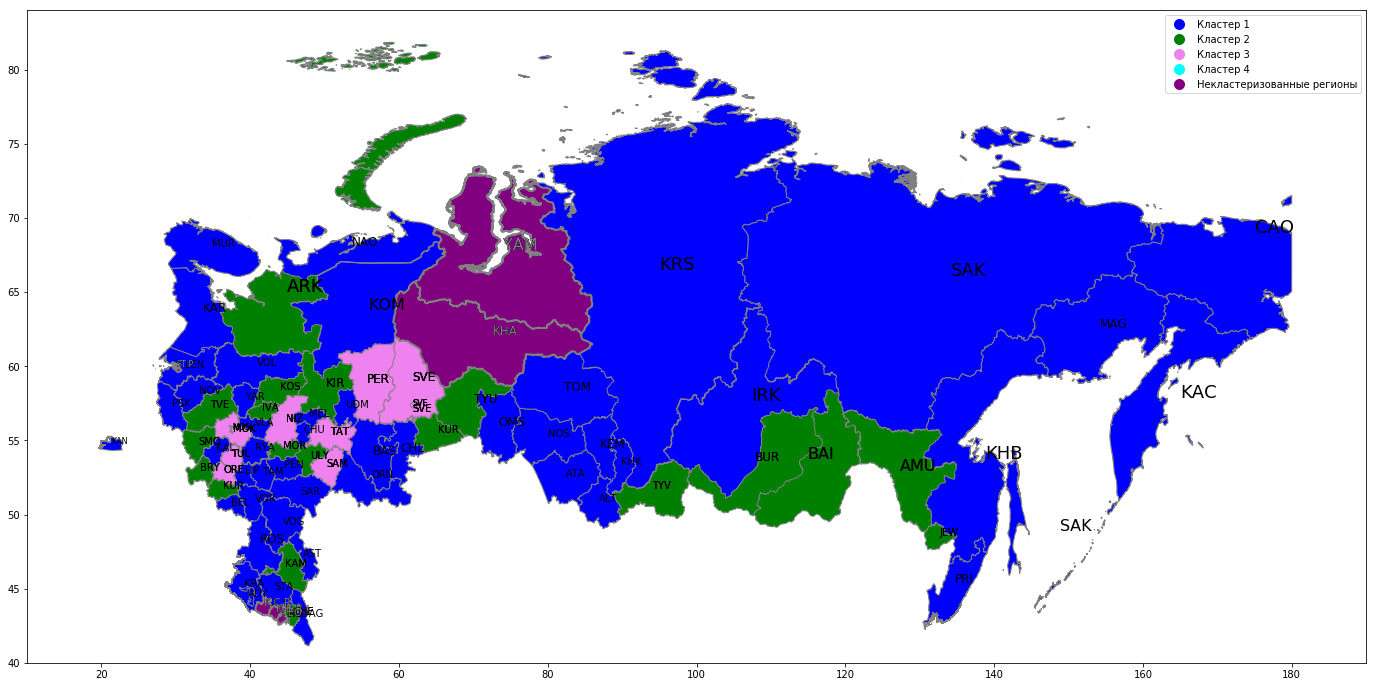

Год:  2006


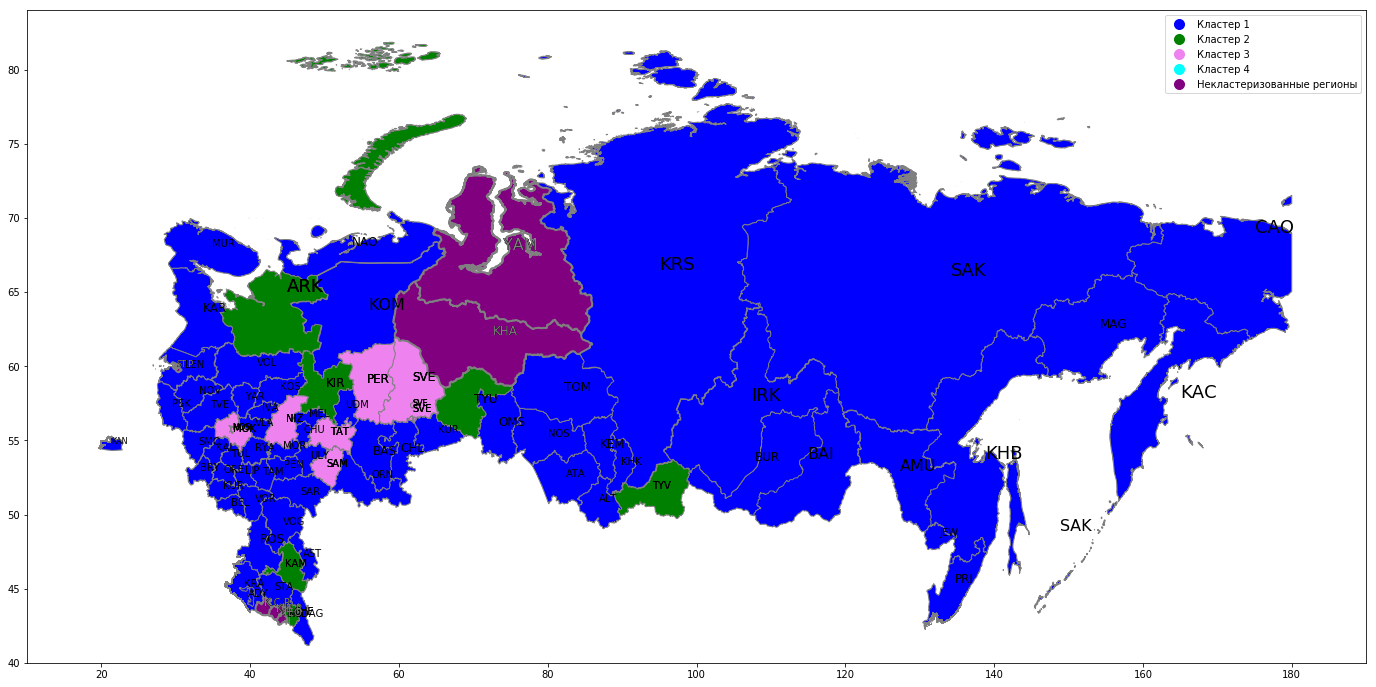

Год:  2007


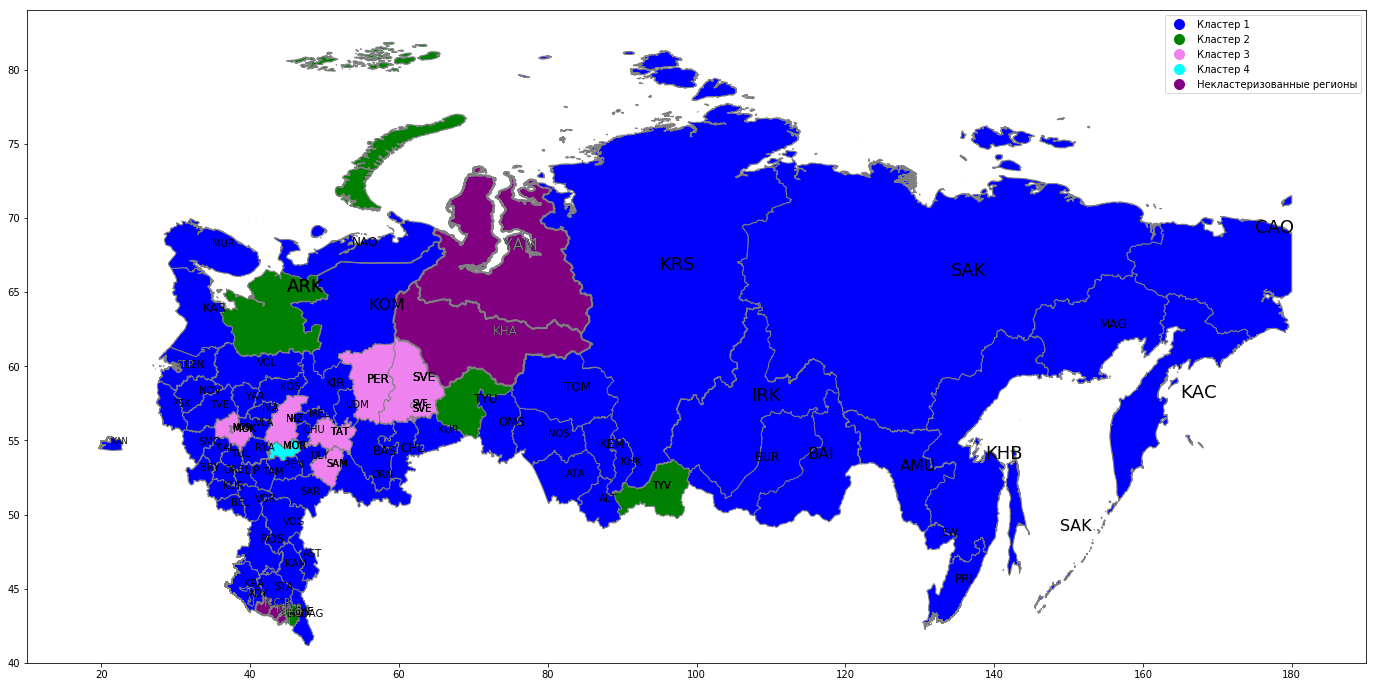

Год:  2008


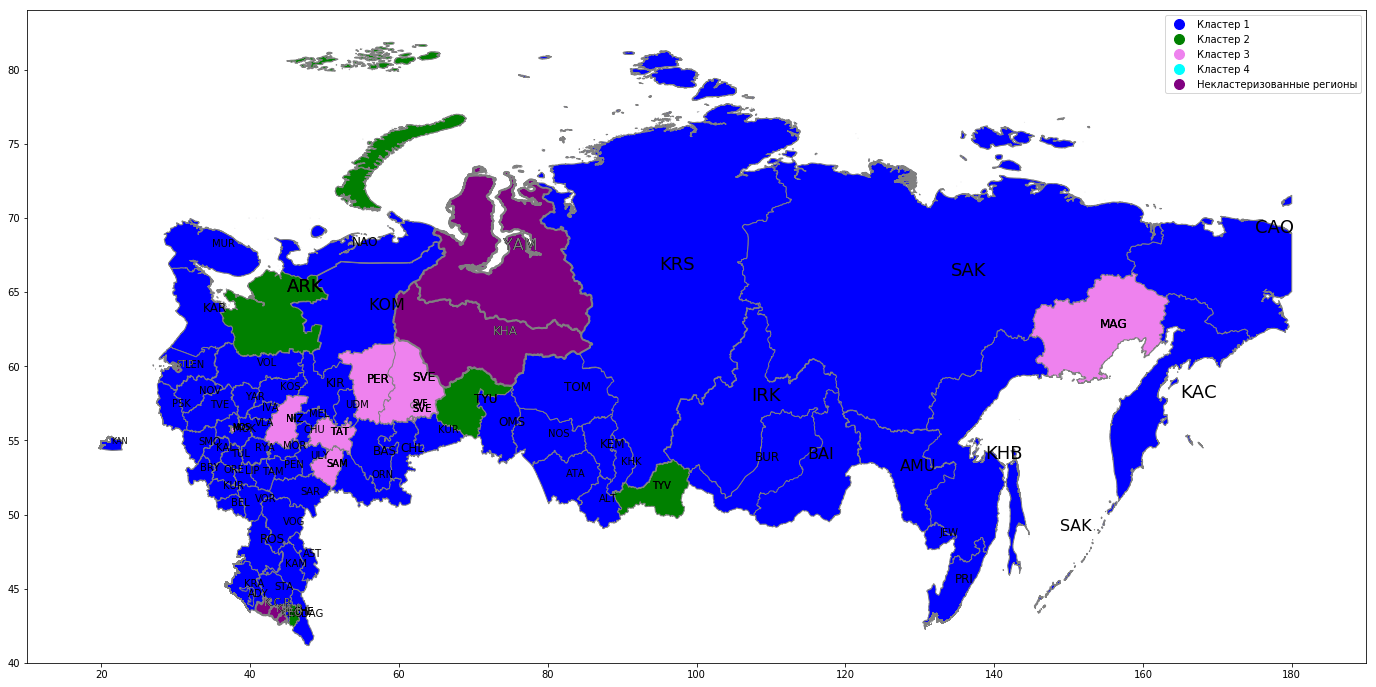

Год:  2009


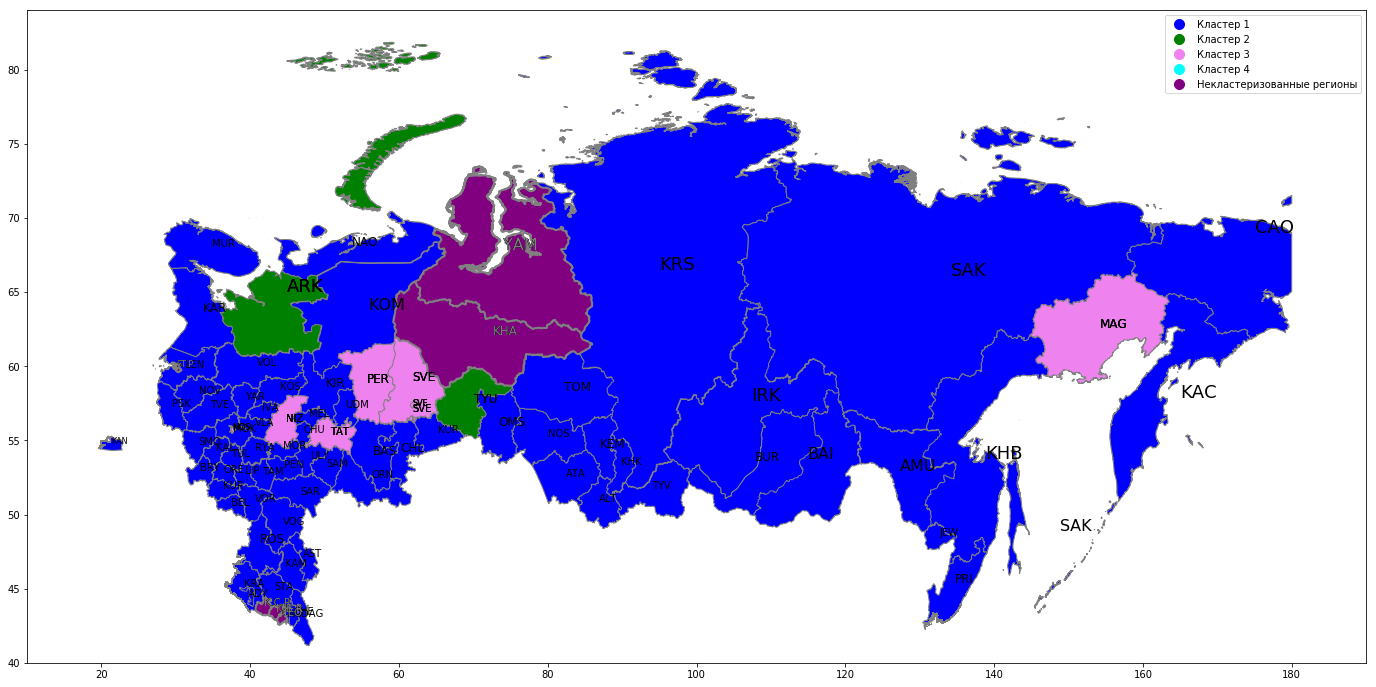

Год:  2010


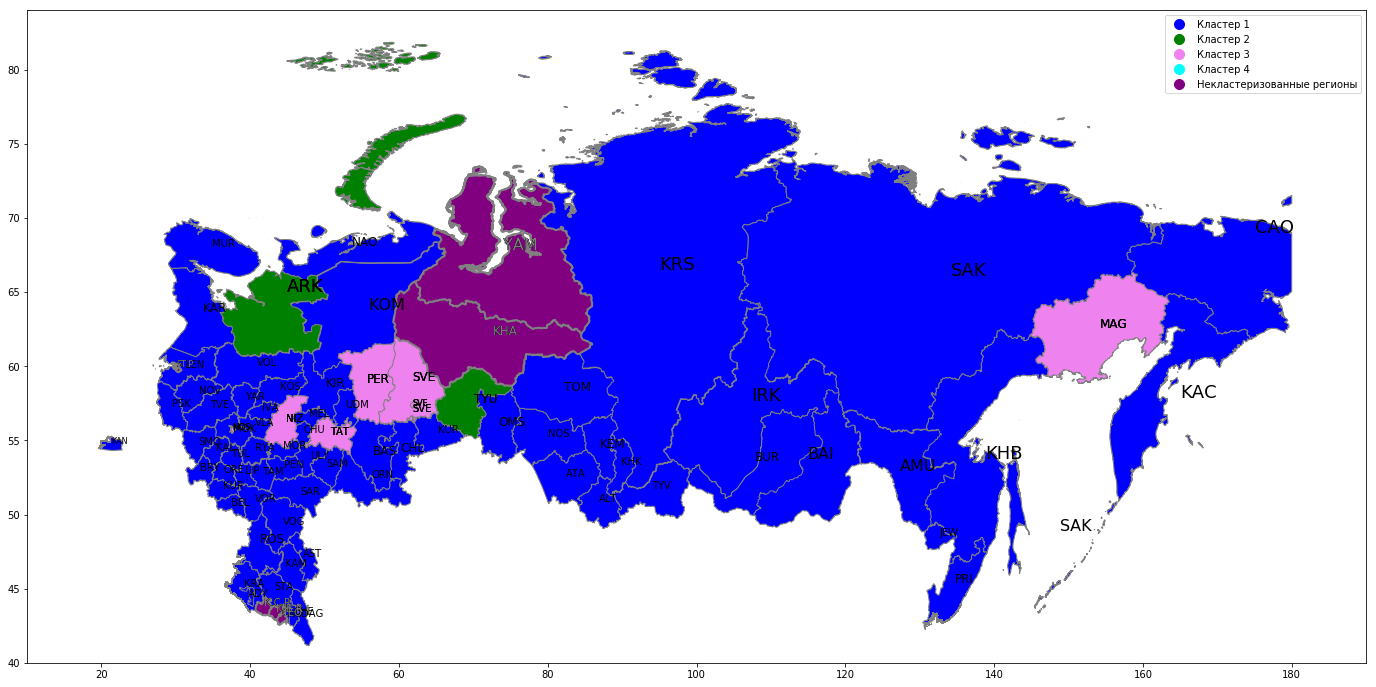

Год:  2011


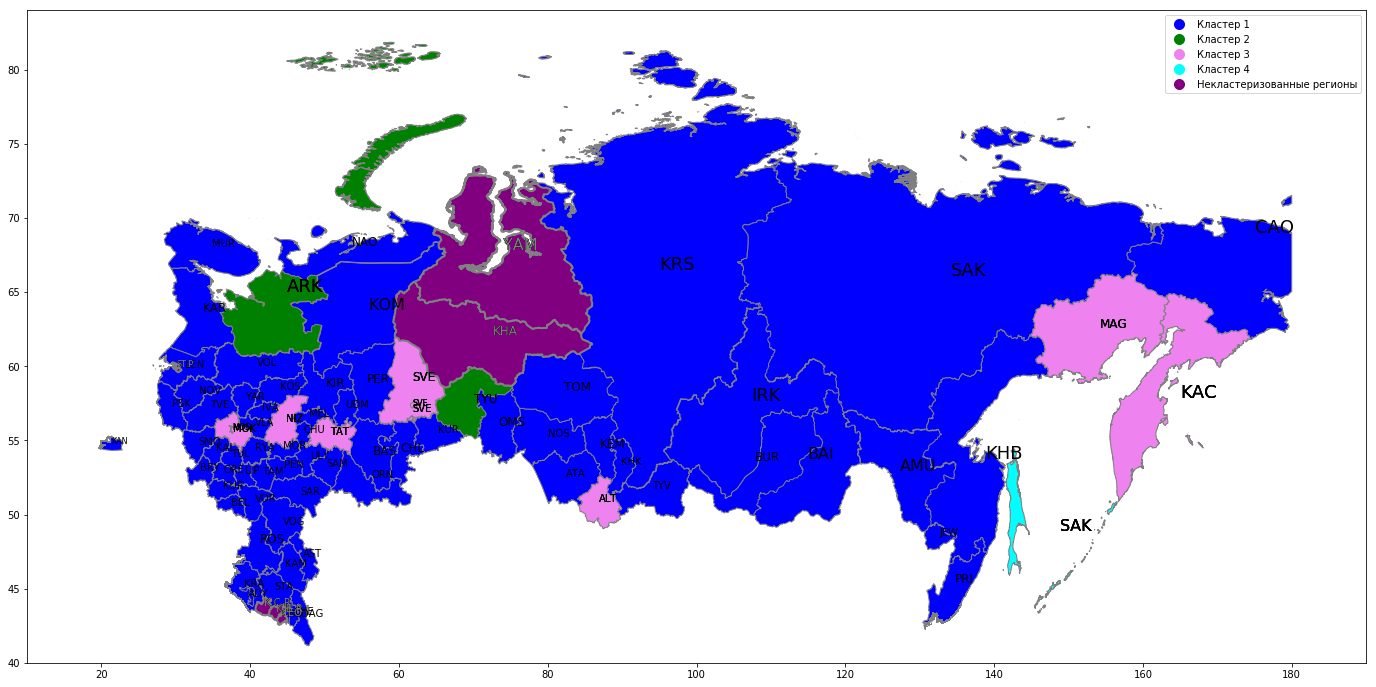

Год:  2012


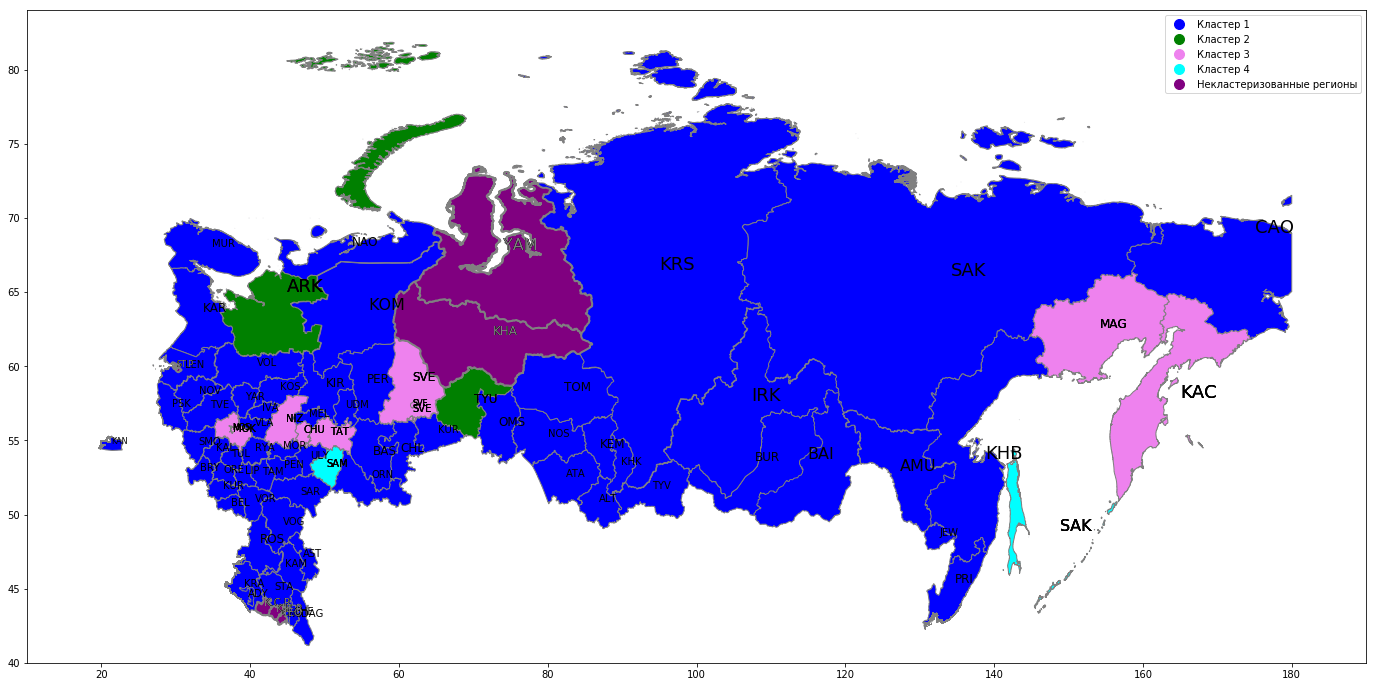

Год:  2013


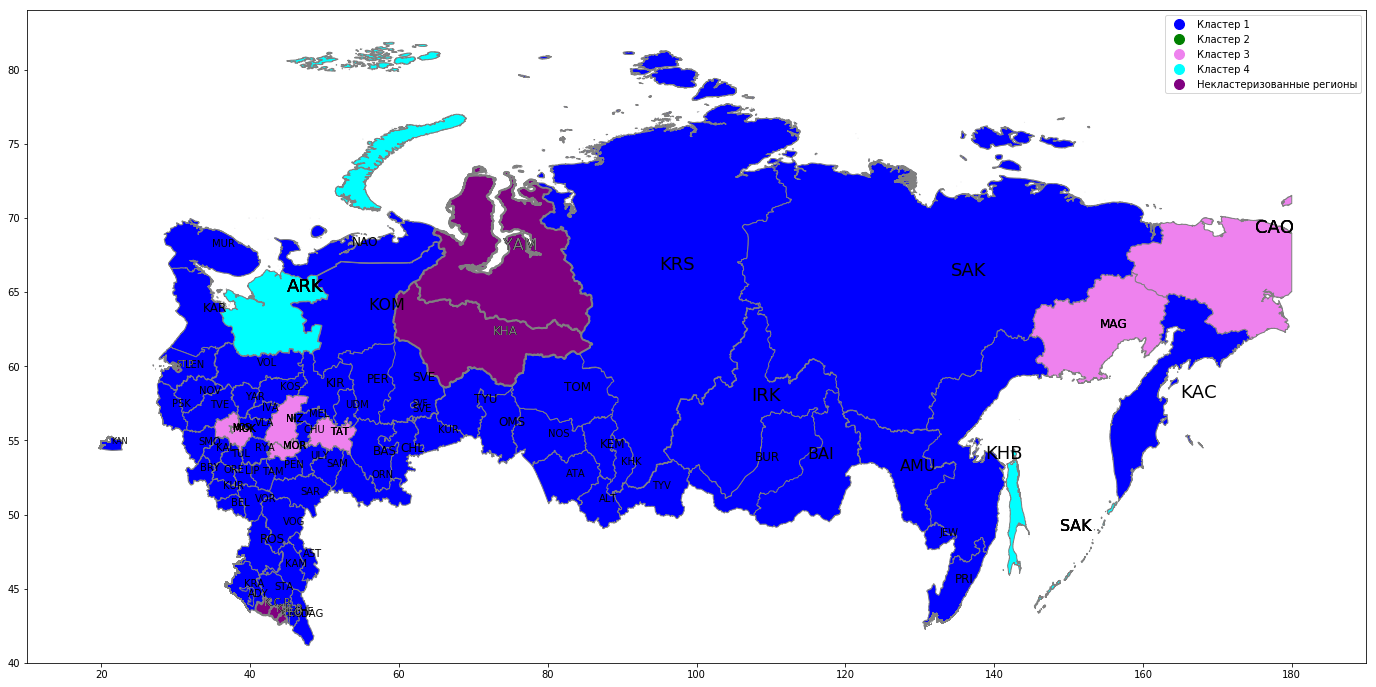

Год:  2014


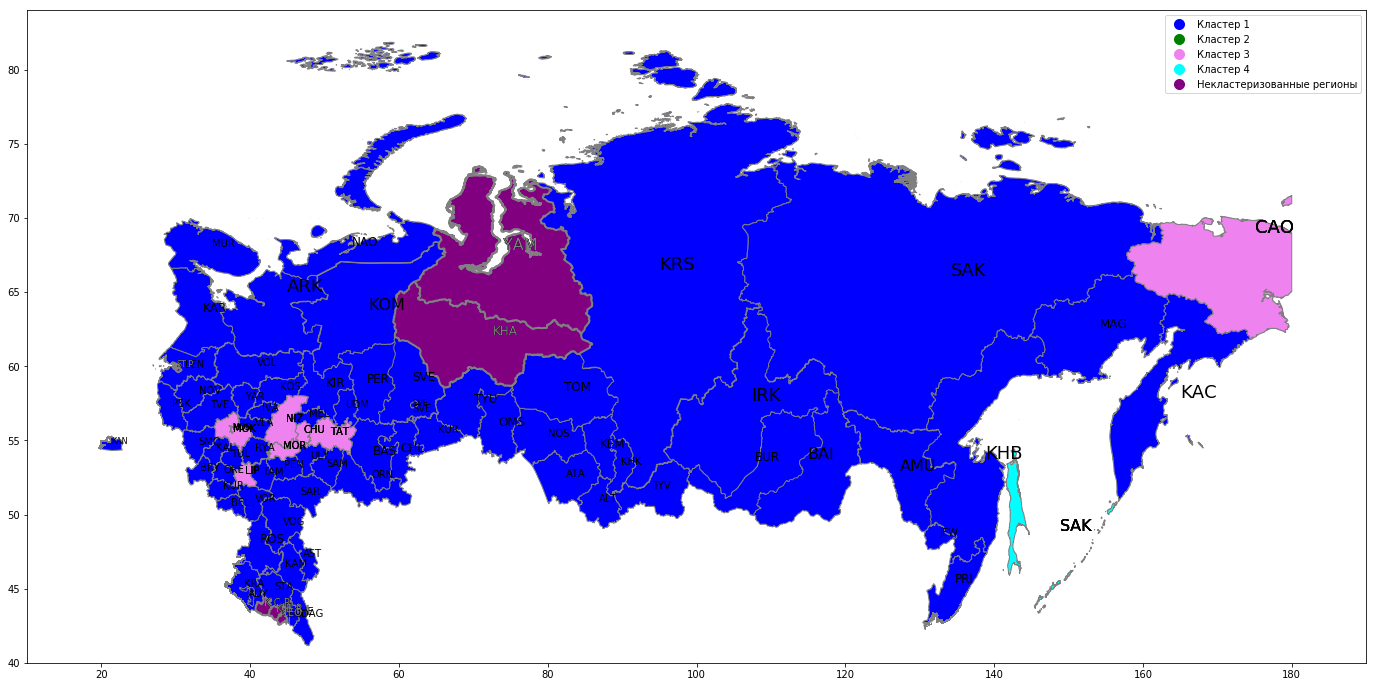

In [84]:
for year in years:
    print("Год: ", year)
    draw_clustered_regions(
        clustered_map_indexes[year],
        map_codes_indexes_bijection,
        region_codes_description,
        ['blue', 'green', 'violet', 'cyan'],
        rus_adm_units_shapes
    )

Глядя на карты мы можем сделать ещё несколько выводов:
\begin{enumerate}
\item Большая часть \verb'"Отстающих"' или \verb'"Аномальных"' регионов отстаят далеко от административного центра - Московского региона. Отстающие - в основном некоторые регионы крайнего севера, либо же - республики Кавказа. Аномальные - Сибирь, Дальний восток.
\item Большая часть \verb'"Лидеров"' - центральная Россия, Урал, юг Поволжья: Москва, Свердловская область, Татарстан то есть наиболее богатые/населённые  административные единицы Российской Федерации.
\end{enumerate}

\addcontentsline{toc}{section}{Список используемой литературы}
\begin{thebibliography}{}
    \bibitem{litlink1} \href{https://web.stanford.edu/~hastie/ElemStatLearn/} {The Elements of Statistical Learning. Trevor Hastie Robert Tibshirani Jerome Friedman. Фундаментальное введение в методы машинного обучения. Наиболее известная книга в этой области.}
    \bibitem{litlink2} \href{https://saravananthirumuruganathan.wordpress.com/about/} {Introduction To Mean Shift Algorithm. Saravanan Thirumuruganathan. Неформальное введение в MeanShift алгоритм c ссылками для дальнейшего изучения}
    \bibitem{litlink3} \href{https://datascience.stackexchange.com/questions/10228/gini-impurity-vs-entropy} {Gini Impurity vs Entropy. Вопрос на Stackexchange с краткими и ясными ответами и всеми необходимыми ссылками}
    \bibitem{litlink4} \href{https://www.stat.berkeley.edu/~breiman/RandomForests/cc_home.htm} {Random Forests.
Leo Breiman and Adele Cutler  Описание Random Forest алгоритма от его авторов}
    \bibitem{litlink5} \href{http://scikit-learn.org/stable/documentation.html} {Документация библиотеки ScikitLearn Содержит так же огромное количество теоретических сведений и ссылок для дальнейшего изучения}
\end{thebibliography}